### *Информация о собранных метеорологических данных из города Базель (Швейцария)* ###

1) <span style="color:#8ACDD7;">*Задержка - 47.75 секунд*</span>
    - Временная задержка между сбором, обработкой и записью данных

2) <span style="color:#8ACDD7;">*Долгота - 7.5°*</span>
    - Координаты долготы, связанные с городом и метеостанцией

3) <span style="color:#8ACDD7;">*Высота над уровнем моря - 363.653 м.*</span>
    - Расстояние по вертикали от метеостанции до среднего уровня поверхности моря

### *Импорты* ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### *Загрузка данных* ###

In [2]:
df = pd.read_csv('./db/basel(1940-2023).csv')

### *Исследование данных* ###

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735480 entries, 0 to 735479
Data columns (total 48 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Temperature [2 m elevation corrected]          735480 non-null  float64
 1   Growing Degree Days [2 m elevation corrected]  735480 non-null  float64
 2   Temperature [900 mb]                           735480 non-null  float64
 3   Temperature [850 mb]                           735480 non-null  float64
 4   Temperature [800 mb]                           735480 non-null  float64
 5   Temperature [700 mb]                           735480 non-null  float64
 6   Temperature [500 mb]                           735480 non-null  float64
 7   Precipitation Total                            735480 non-null  float64
 8   Relative Humidity [2 m]                        735480 non-null  float64
 9   Snowfall Amount                      

In [4]:
pd.set_option('display.max_columns', 47)

df.describe(include='all')

Temperature [2 m elevation corrected]  \
count                          735480.000000   
mean                               10.470251   
std                                 8.159448   
min                               -22.969755   
25%                                 4.370246   
50%                                10.390245   
75%                                16.290245   
max                                38.570248   

       Growing Degree Days [2 m elevation corrected]  Temperature [900 mb]  \
count                                  735480.000000         735480.000000   
mean                                        0.148527              7.089209   
std                                         0.203646              7.098507   
min                                         0.000000            -23.810000   
25%                                         0.000000              1.900000   
50%                                         0.016260              7.280000   
75%                                         0.262094             12.240000   
max                                         0.833333             30.670000   

       Temperature [850 mb]  Temperature [800 mb]  Temperature [700 mb]  \
count         735480.000000         735480.000000         735480.000000   
mean               4.567746              1.962806             -3.805440   
std                6.719453              6.447805              6.054268   
min              -24.720000            -27.420000            -34.590000   
25%               -0.160000             -2.400000             -7.760000   
50%                4.780000              2.120000             -3.380000   
75%                9.430000              6.680000              0.770000   
max               26.380000             23.000000             13.250000   

       Temperature [500 mb]  Precipitation Total  Relative Humidity [2 m]  \
count         735480.000000        735480.000000            735480.000000   
mean             -19.794587             0.099375                77.148638   
std                6.129180             0.303528                15.348269   
min              -44.000000             0.000000                10.013839   
25%              -23.820000             0.000000                67.995029   
50%              -19.400000             0.000000                81.519125   
75%              -14.910000             0.000000                89.085457   
max               -4.500000            19.200000               100.133920   

       Snowfall Amount     Snow Depth      Wind Gust  Wind Speed [10 m]  \
count    735480.000000  735480.000000  735480.000000      735480.000000   
mean          0.005365       0.001033       5.541280           2.040058   
std           0.042625       0.004735       3.089472           1.299888   
min           0.000000       0.000000       0.000000           0.000000   
25%           0.000000       0.000000       3.400000           1.170470   
50%           0.000000       0.000000       4.600000           1.700000   
75%           0.000000       0.000000       6.800000           2.517936   
max           2.730000       0.070000      36.700000          14.838464   

       Wind Direction [10 m]  Wind Speed [100 m]  Wind Direction [100 m]  \
count          735480.000000       735480.000000           735480.000000   
mean              171.277668            3.573005              172.928789   
std                96.698715            2.199261               99.742668   
min                 0.895157            0.000000                0.682053   
25%                89.999990            2.024846               77.471180   
50%               175.914380            3.106445              194.036240   
75%               240.642260            4.588028              245.725560   
max               360.000000           23.577108              360.000000   

       Wind Speed [900 mb]  Wind Direction [900 mb]  Wind Speed [850 mb]  \
count        735480.000000            735480.000000        73548

### *Параметры* ###
Новые данные заносились каждый час, и по каждому параметру не производилось агрегирование

### <span style="color:#8ACDD7;">*Температура (°C):*</span> ###
- Уровень - корректировка высоты на 2 м.
- Температура воздуха на стандартной высоте 2 м над уровнем земли

### *Среднее значение температуры с 1940 по 2023 год* ###

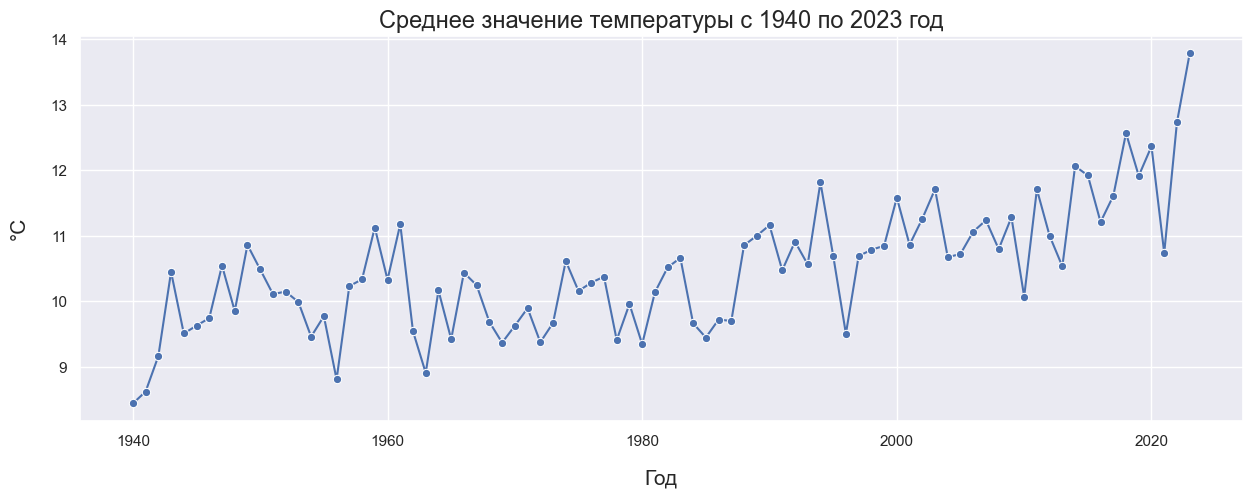

In [5]:
sns.set(style="darkgrid", font='Arial')



mean_temperature_by_year = df.groupby('Year')['Temperature [2 m elevation corrected]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение температуры с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('°C', fontsize=15, labelpad=15)

sns.lineplot(x=mean_temperature_by_year['Year'], y=mean_temperature_by_year['Temperature [2 m elevation corrected]'], marker='o')

plt.show()

### *Максимальное и минимальное значение температуры с 1940 по 2023 год* ###

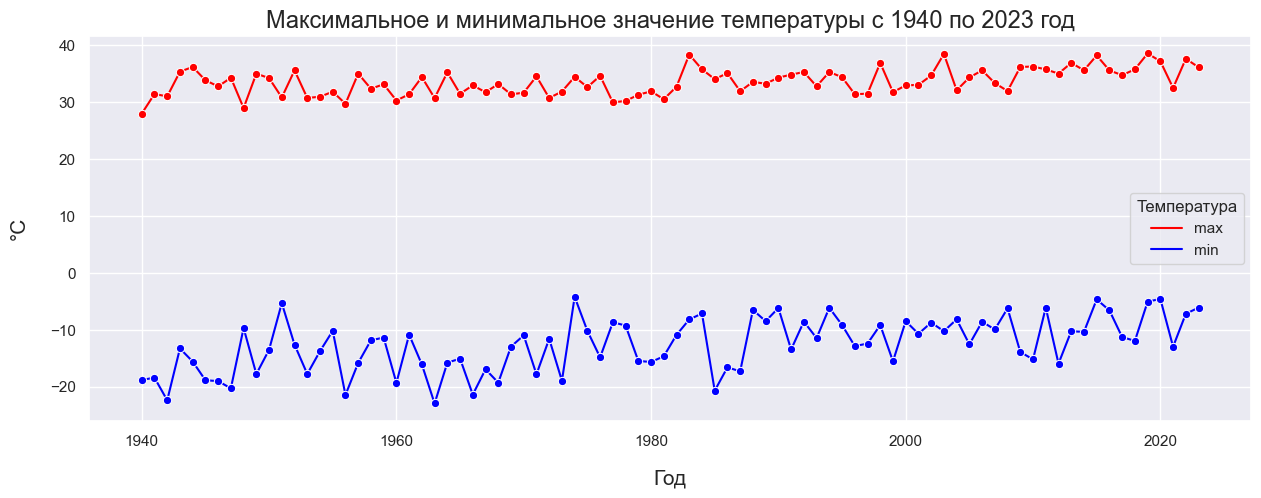

In [6]:
agg_df = df.groupby('Year')['Temperature [2 m elevation corrected]'].agg(['max', 'min']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Температура', value_name='Temperature [2 m elevation corrected]')

plt.figure(figsize=(15, 5))
plt.title('Максимальное и минимальное значение температуры с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('°C', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Temperature [2 m elevation corrected]', hue='Температура', marker='o', data=melted_df, 
             palette={'max': 'red', 'min': 'blue'})

plt.show()

### *Среднее значение температуры за каждый месяц* ###

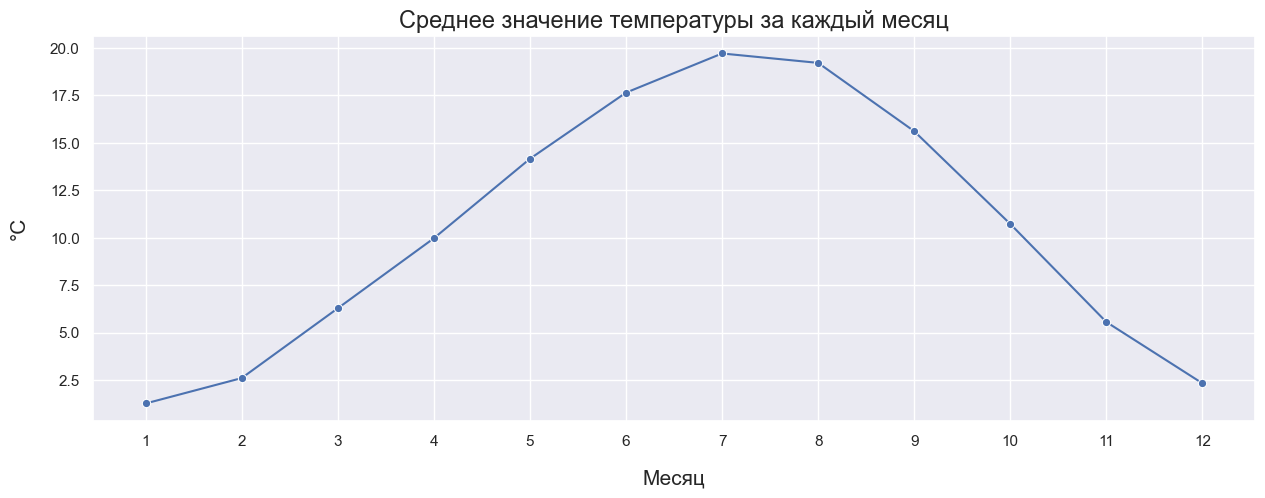

In [7]:
mean_temperature_every_month = df.groupby('Month')['Temperature [2 m elevation corrected]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение температуры за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('°C', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_temperature_every_month['Month'], rotation=0)

sns.lineplot(x=mean_temperature_every_month['Month'], y=mean_temperature_every_month['Temperature [2 m elevation corrected]'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Температура (°C):*</span> ###
- Уровень: 900 мб., 850 мб., 800 мб., 700 мб., 500 мб.
- Температура воздуха при различных уровнях атмосферного давления

### *Распределение значения температуры при различном атмосферном давлении* ###

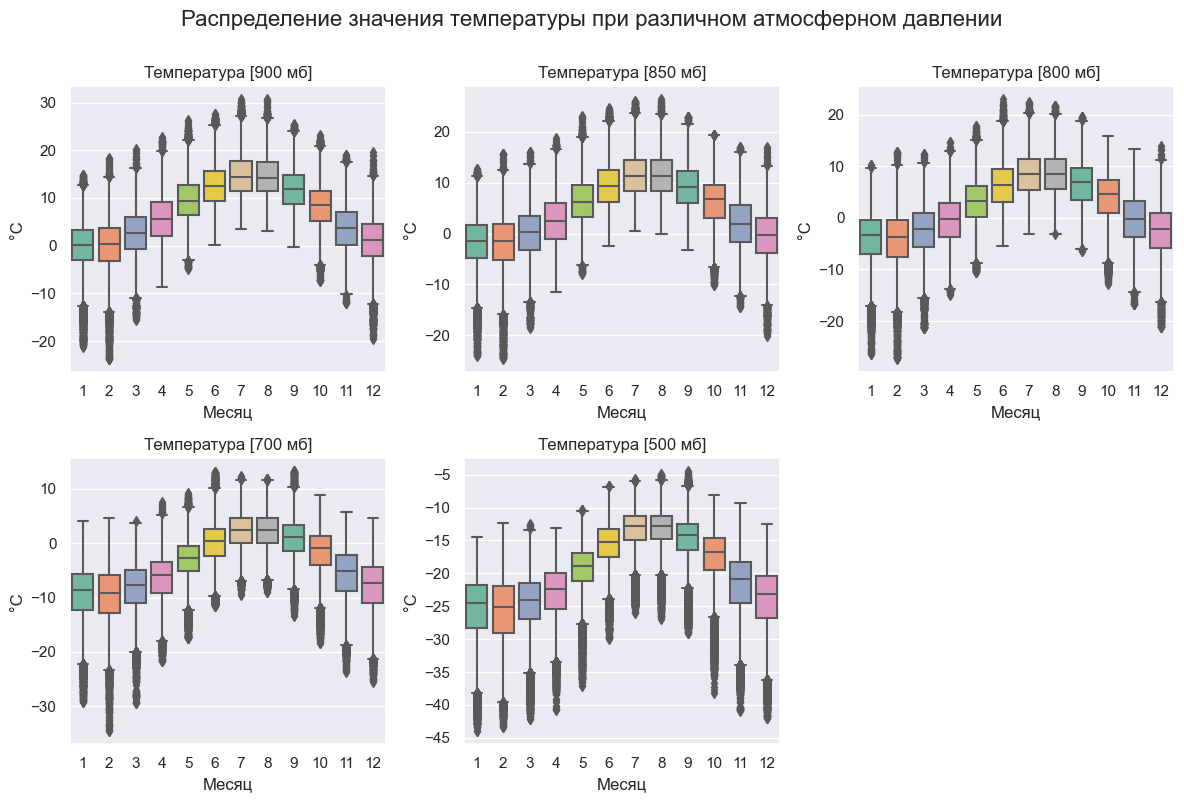

In [8]:
columns_list = ['Temperature [900 mb]', 
                'Temperature [850 mb]', 
                'Temperature [800 mb]', 
                'Temperature [700 mb]', 
                'Temperature [500 mb]']

columns_dict = {'Temperature [900 mb]':'Температура [900 мб]', 
                'Temperature [850 mb]':'Температура [850 мб]', 
                'Temperature [800 mb]':'Температура [800 мб]', 
                'Temperature [700 mb]':'Температура [700 мб]', 
                'Temperature [500 mb]':'Температура [500 мб]'}

rows = 2
cols = (len(columns_list) + rows - 1) // rows

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 4 * rows))

for i, column in enumerate(columns_list):
    ax = axes[i // cols, i % cols]
    sns.boxplot(data=df,  x='Month', y=column, palette='Set2', ax=ax)
    ax.set_title(columns_dict[column])
    ax.set_xlabel('Месяц')
    ax.set_ylabel('°C')

fig.delaxes(axes[1, 2])

plt.suptitle('Распределение значения температуры при различном атмосферном давлении', y=1.00, fontsize=16)
plt.tight_layout()

### <span style="color:#8ACDD7;">*Дни роста градуса (GDDc):*</span> ###
- Уровень - корректировка высоты на 2 м.
- Общее количество тепловых единиц, накопленных за определенное время

### *Среднее значение количества дней роста градуса с 1940 по 2023 год* ###

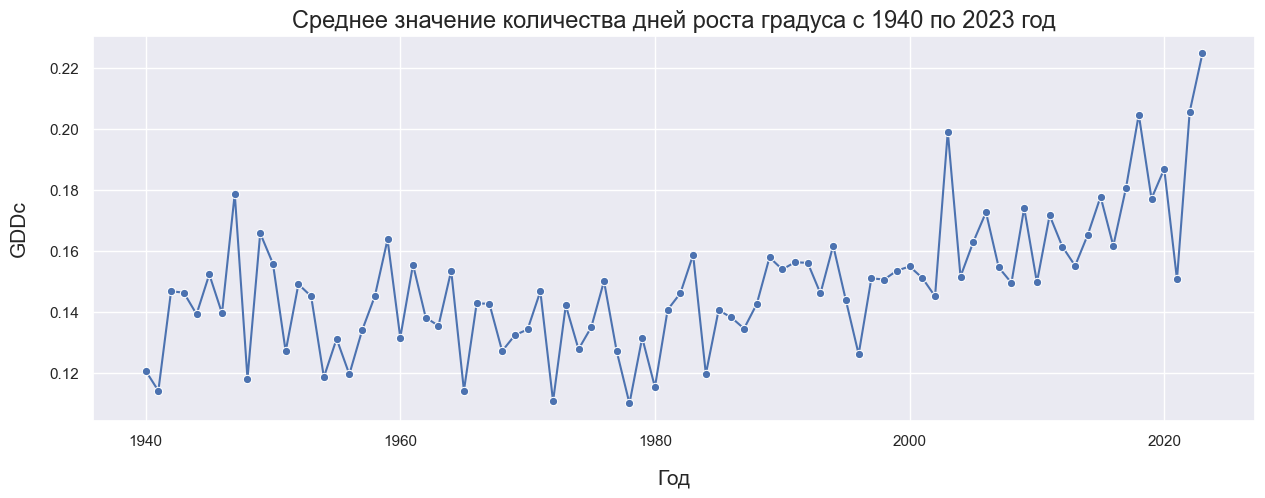

In [9]:
mean_growing_degree_days_by_year = df.groupby('Year')['Growing Degree Days [2 m elevation corrected]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение количества дней роста градуса с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('GDDc', fontsize=15, labelpad=15)

sns.lineplot(x=mean_growing_degree_days_by_year['Year'], y=mean_growing_degree_days_by_year['Growing Degree Days [2 m elevation corrected]'], 
             marker='o')

plt.show()

### *Максимальное значение количества дней роста градуса с 1940 по 2023 год* ###

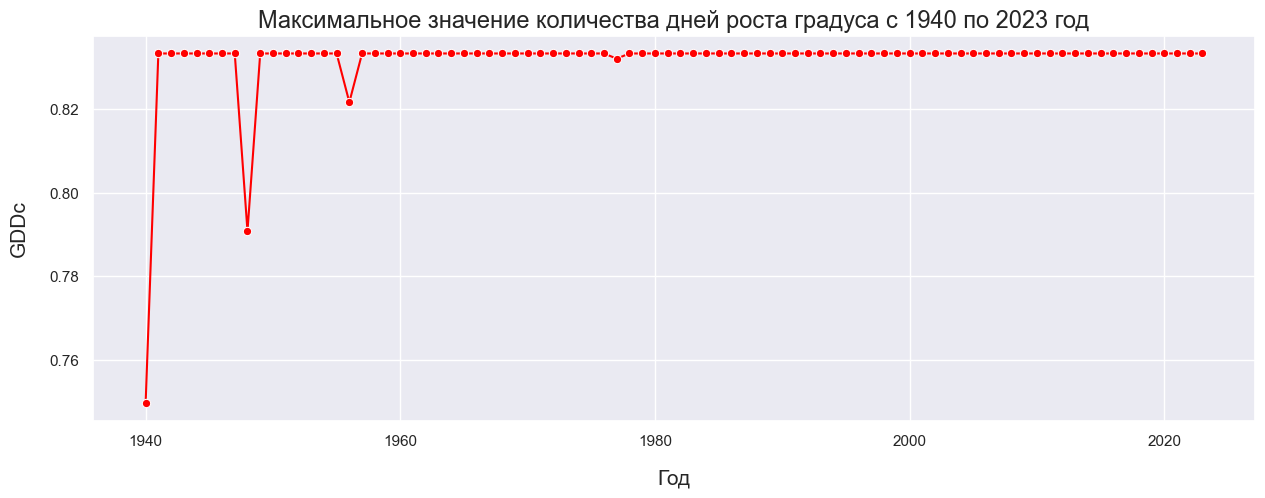

In [10]:
agg_df = df.groupby('Year')['Growing Degree Days [2 m elevation corrected]'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Дни роста градуса', value_name='Growing Degree Days [2 m elevation corrected]')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение количества дней роста градуса с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('GDDc', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Growing Degree Days [2 m elevation corrected]', hue='Дни роста градуса', marker='o', data=melted_df, 
             palette={'max': 'red'}, legend=False)

plt.show()

### *Среднее значение количества дней роста градуса за каждый месяц* ###

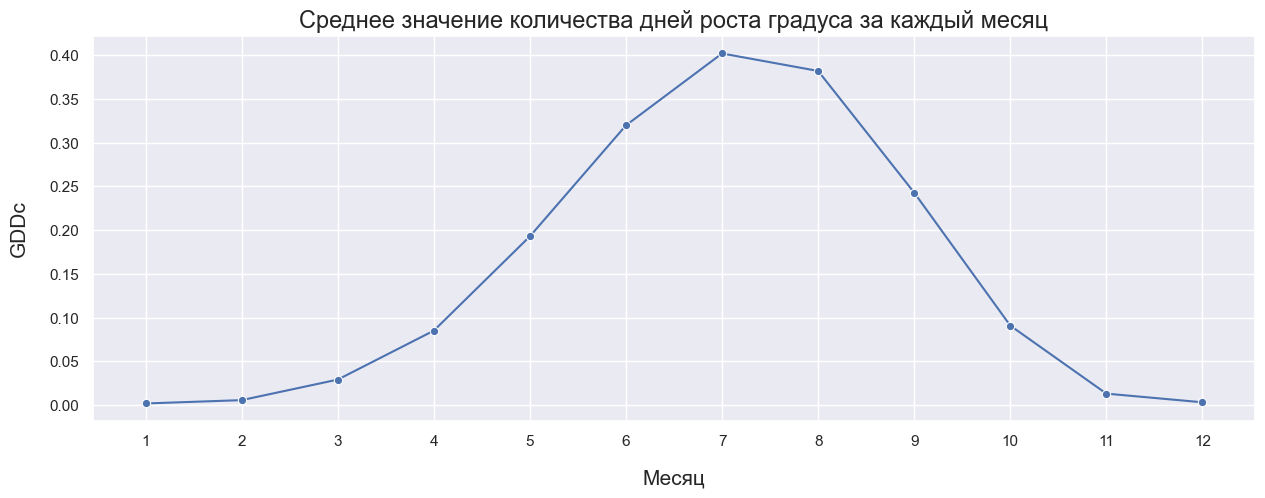

In [11]:
mean_growing_degree_days_every_month = df.groupby('Month')['Growing Degree Days [2 m elevation corrected]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение количества дней роста градуса за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('GDDc', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_growing_degree_days_every_month['Month'], rotation=0)

sns.lineplot(x=mean_growing_degree_days_every_month['Month'], y=mean_growing_degree_days_every_month['Growing Degree Days [2 m elevation corrected]'], 
             marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Количество осадков (мм):*</span> ###
- Уровень - поверхность
- Представляет собой общее количество осадков, включая дождь, снег или любую другую форму жидких или твердых частиц воды

### *Среднее значение количества осадков с 1940 по 2023 год* ###

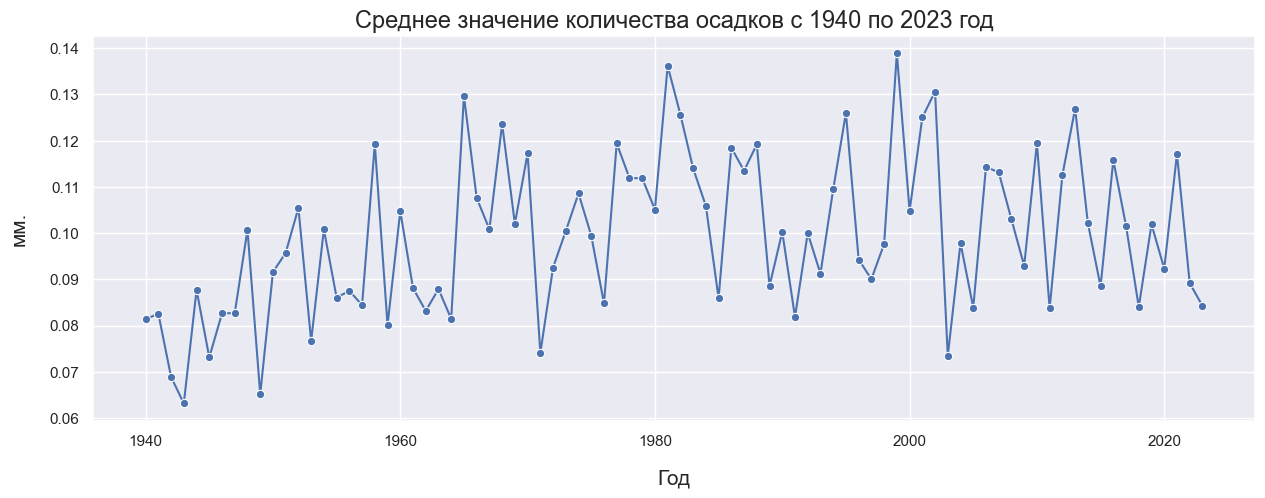

In [12]:
mean_precipitation_total_by_year = df.groupby('Year')['Precipitation Total'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение количества осадков с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('мм.', fontsize=15, labelpad=15)

sns.lineplot(x=mean_precipitation_total_by_year['Year'], y=mean_precipitation_total_by_year['Precipitation Total'], marker='o')

plt.show()

### *Максимальное значение количества осадков с 1940 по 2023 год* ###

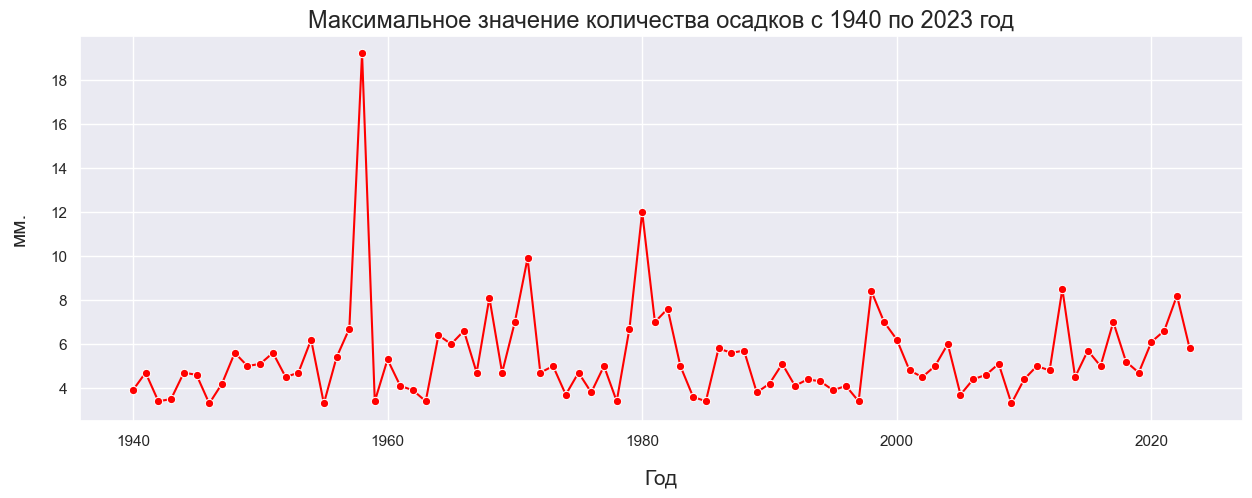

In [13]:
agg_df = df.groupby('Year')['Precipitation Total'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Количество осадков', value_name='Precipitation Total')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение количества осадков с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('мм.', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Precipitation Total', hue='Количество осадков', marker='o', data=melted_df, palette={'max': 'red'}, legend=False)

plt.show()

### *Среднее значение количества осадков за каждый месяц* ###

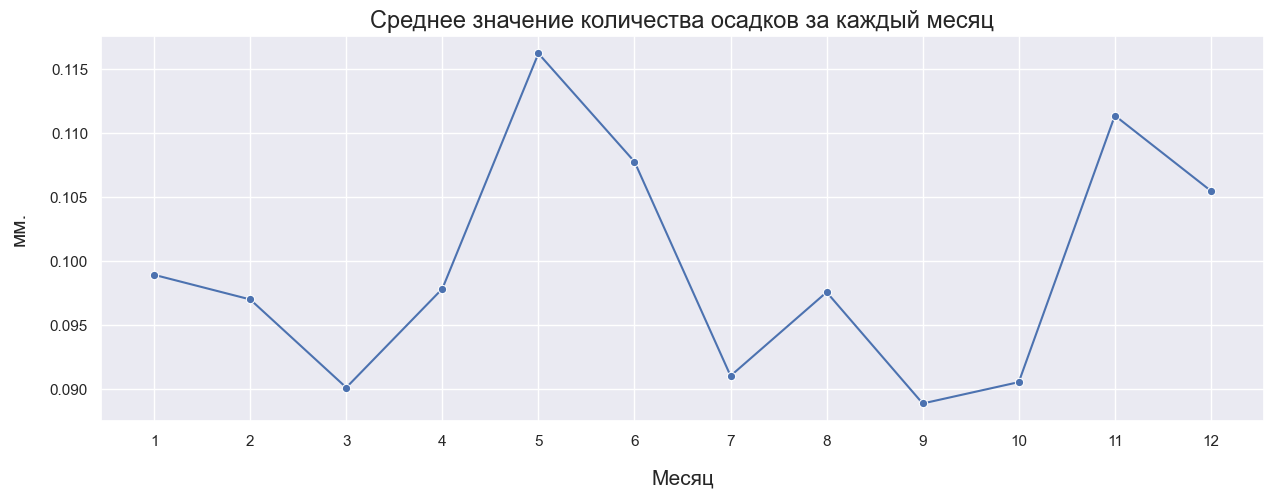

In [14]:
mean_precipitation_total_every_month = df.groupby('Month')['Precipitation Total'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение количества осадков за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('мм.', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_precipitation_total_every_month['Month'], rotation=0)

sns.lineplot(x=mean_precipitation_total_every_month['Month'], y=mean_precipitation_total_every_month['Precipitation Total'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Относительная влажность (%):*</span> ###
- Уровень - 2 м.
- Показатель содержания влаги в воздухе по отношению к максимальному количеству, которое он может содержать при данной температуре

### *Среднее значение относительной влажности с 1940 по 2023 год* ###

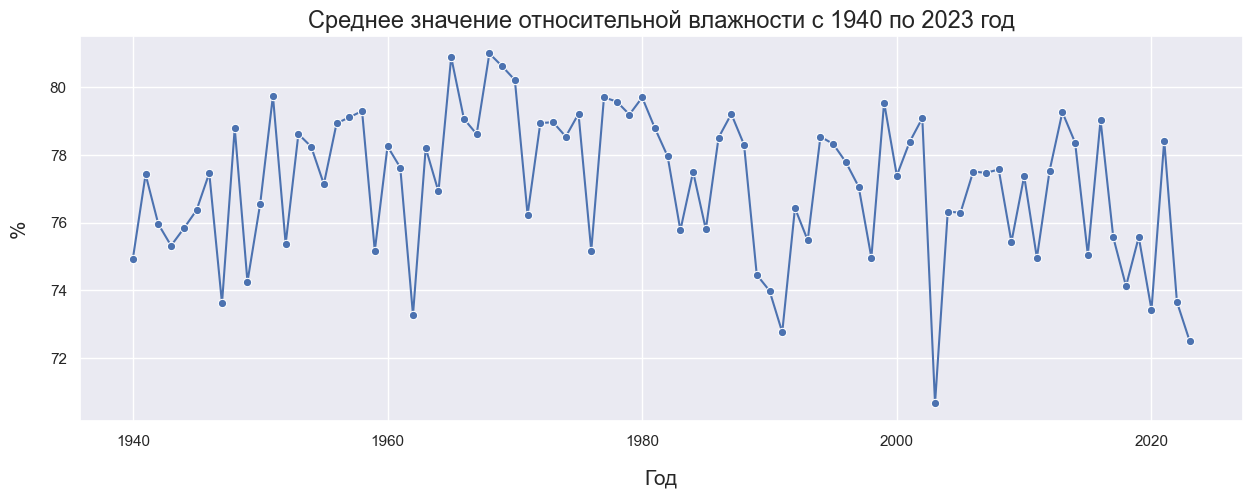

In [15]:
mean_relative_humidity_by_year = df.groupby('Year')['Relative Humidity [2 m]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение относительной влажности с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('%', fontsize=15, labelpad=15)

sns.lineplot(x=mean_relative_humidity_by_year['Year'], y=mean_relative_humidity_by_year['Relative Humidity [2 m]'], marker='o')

plt.show()

### *Минимальное значение относительной влажности с 1940 по 2023 год* ###

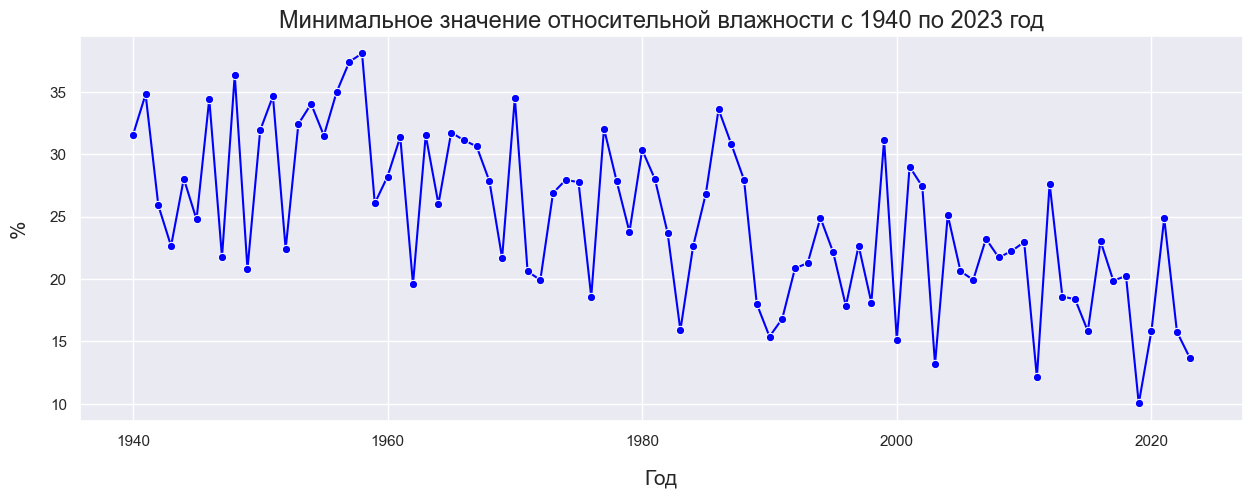

In [16]:
agg_df = df.groupby('Year')['Relative Humidity [2 m]'].agg(['min']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Относительная влажность', value_name='Relative Humidity [2 m]')

plt.figure(figsize=(15, 5))
plt.title('Минимальное значение относительной влажности с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('%', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Relative Humidity [2 m]', hue='Относительная влажность', marker='o', data=melted_df, palette={'min': 'blue'}, legend=False)

plt.show()

### *Среднее значение относительной влажности за каждый месяц* ###

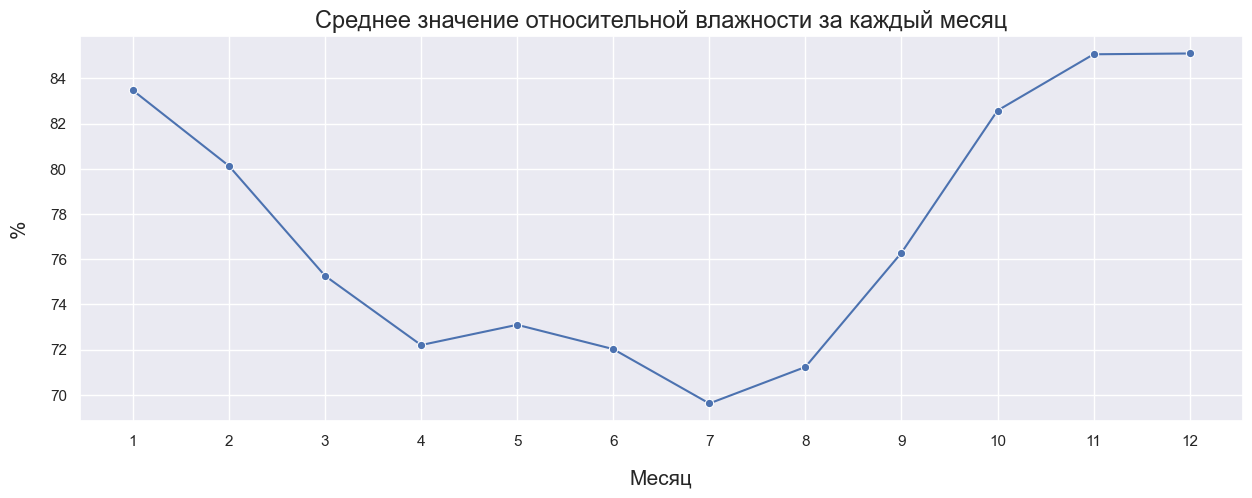

In [17]:
mean_relative_humidity_every_month = df.groupby('Month')['Relative Humidity [2 m]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение относительной влажности за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('%', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_relative_humidity_every_month['Month'], rotation=0)

sns.lineplot(x=mean_relative_humidity_every_month['Month'], y=mean_relative_humidity_every_month['Relative Humidity [2 m]'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Количество снега (см.):*</span> ###
- Уровень - поверхность
- Общее количество выпавшего снега в сантиметрах на уровне поверхности

### *Среднее значение количества снега с 1940 по 2023 год* ###

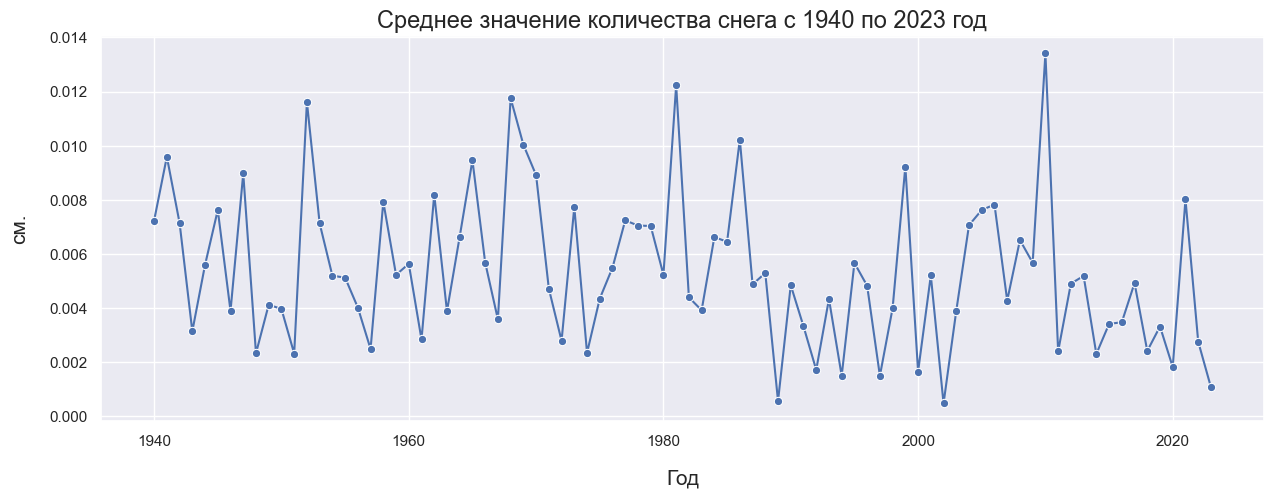

In [18]:
mean_snow_amount_by_year = df.groupby('Year')['Snowfall Amount'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение количества снега с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('см.', fontsize=15, labelpad=15)

sns.lineplot(x=mean_snow_amount_by_year['Year'], y=mean_snow_amount_by_year['Snowfall Amount'], marker='o')

plt.show()

### *Максимальное значение количества снега с 1940 по 2023 год* ###

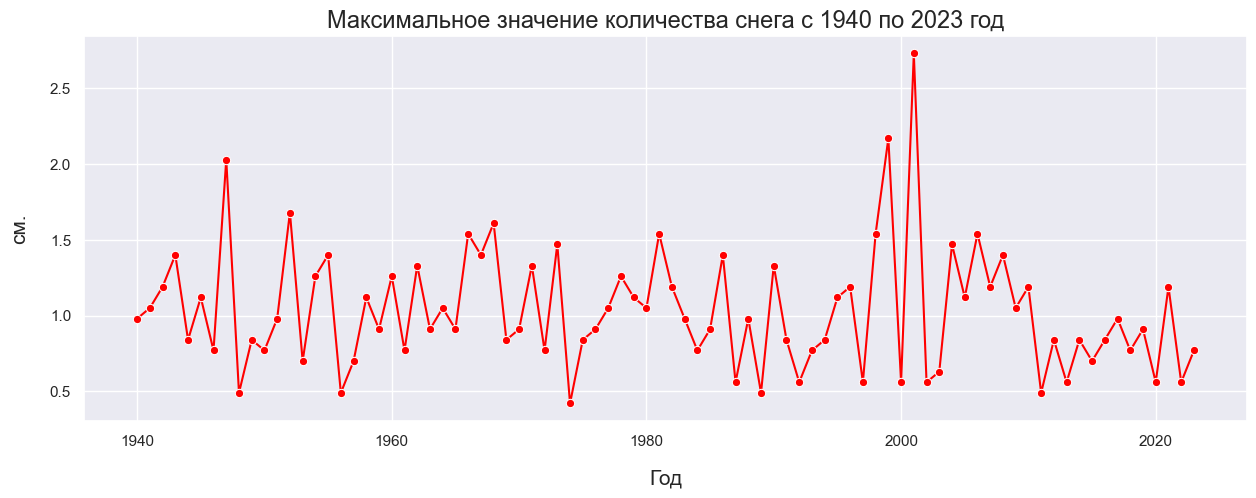

In [19]:
agg_df = df.groupby('Year')['Snowfall Amount'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Количество снега', value_name='Snowfall Amount')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение количества снега с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('см.', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Snowfall Amount', hue='Количество снега', marker='o', data=melted_df, palette={'max': 'red'}, legend=False)

plt.show()

### *Среднее значение количества снега за каждый месяц* ###

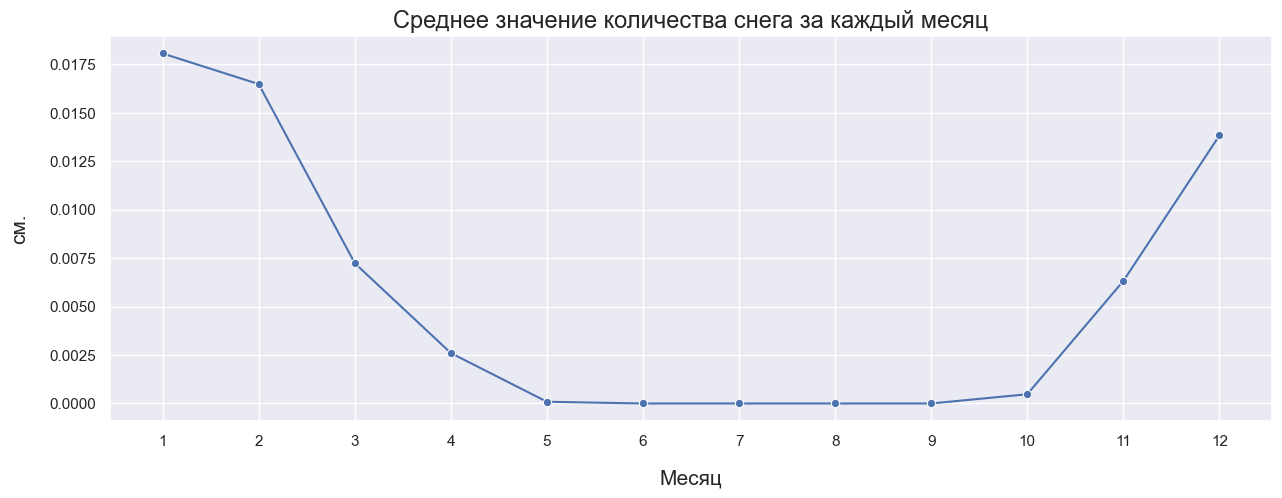

In [20]:
mean_snowfall_amount_every_month = df.groupby('Month')['Snowfall Amount'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение количества снега за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('см.', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_snowfall_amount_every_month['Month'], rotation=0)

sns.lineplot(x=mean_snowfall_amount_every_month['Month'], y=mean_snowfall_amount_every_month['Snowfall Amount'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Глубина снега (м.):*</span> ###
- Уровень - поверхность
- Глубина скопившегося на земле снега на уровне поверхности

### *Среднее значение глубины снега с 1940 по 2023 год* ###

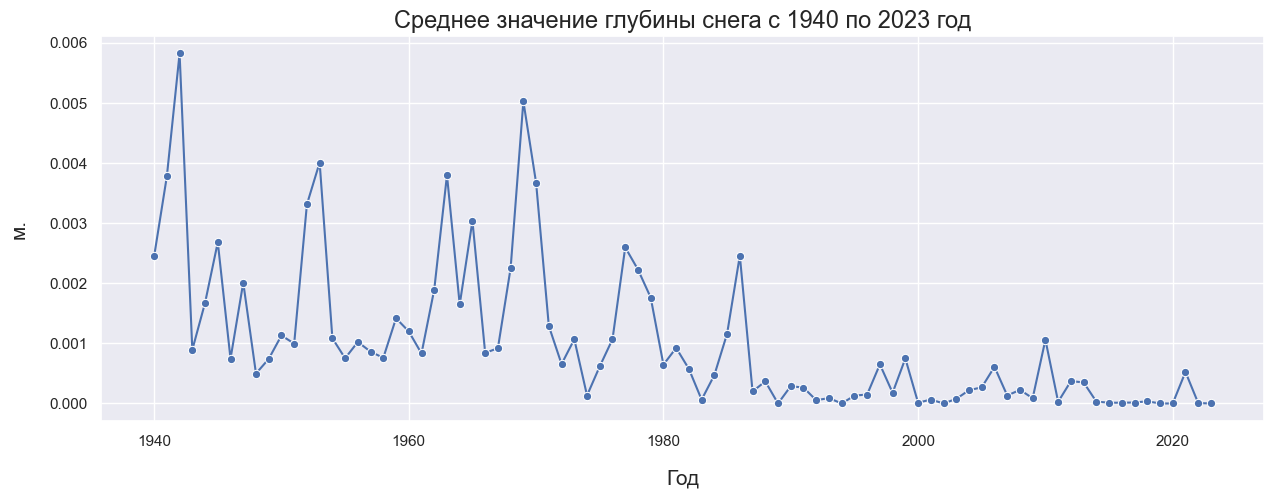

In [21]:
mean_snow_depth_by_year = df.groupby('Year')['Snow Depth'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение глубины снега с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('м.', fontsize=15, labelpad=15)

sns.lineplot(x=mean_snow_depth_by_year['Year'], y=mean_snow_depth_by_year['Snow Depth'], marker='o')

plt.show()

### *Максимальное значение глубины снега с 1940 по 2023 год* ###

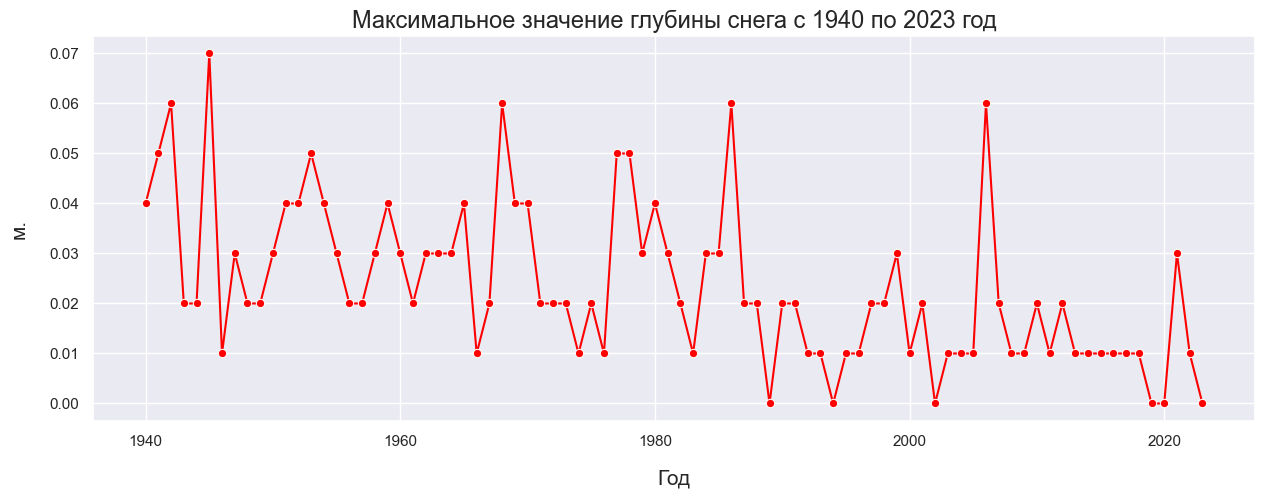

In [22]:
agg_df = df.groupby('Year')['Snow Depth'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Глубина снега', value_name='Snow Depth')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение глубины снега с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('м.', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Snow Depth', hue='Глубина снега', marker='o', data=melted_df, palette={'max': 'red'}, legend=False)

plt.show()

### *Среднее значение глубины снега за каждый месяц* ###

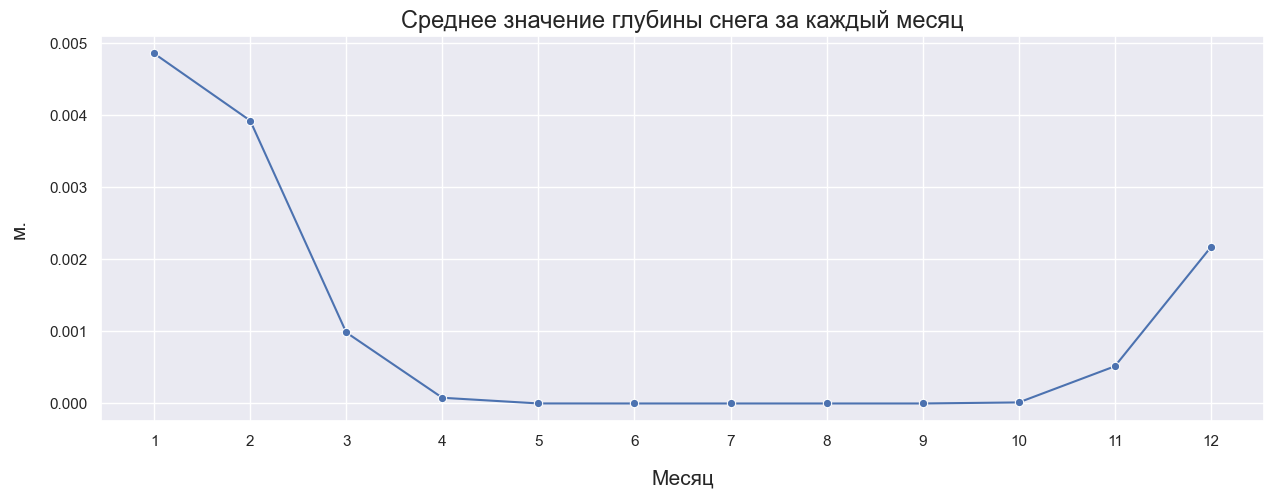

In [23]:
mean_snow_depth_every_month = df.groupby('Month')['Snow Depth'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение глубины снега за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('м.', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_snow_depth_every_month['Month'], rotation=0)

sns.lineplot(x=mean_snow_depth_every_month['Month'], y=mean_snow_depth_every_month['Snow Depth'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Порывы ветра (м/с):*</span> ###
- Уровень - поверхность
- Пиковая скорость ветра, наблюдаемая на уровне поверхности

### *Среднее значение пиковой скорости ветра с 1940 по 2023 год* ###

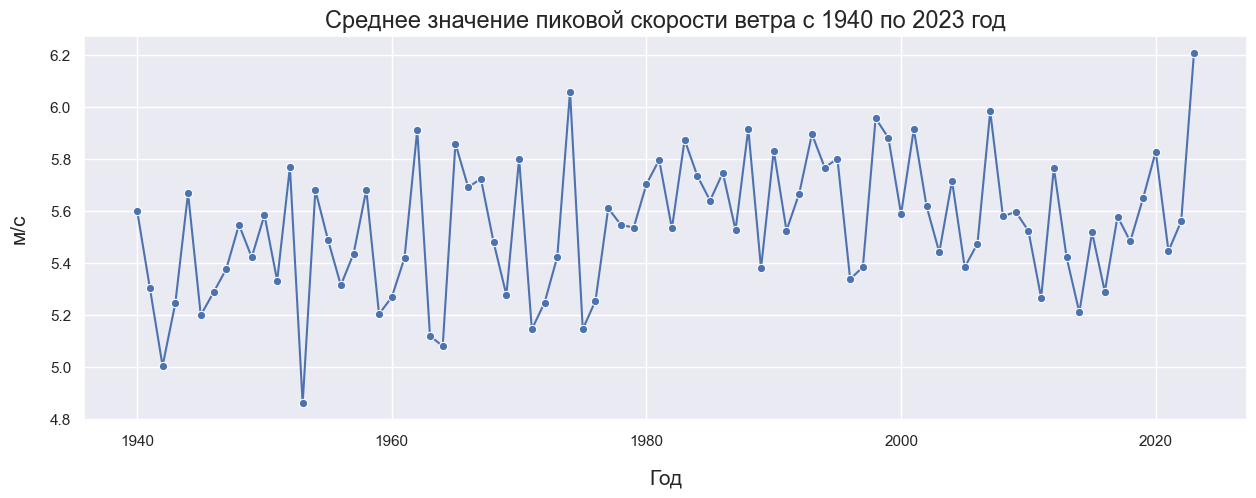

In [24]:
mean_wind_gust_by_year = df.groupby('Year')['Wind Gust'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение пиковой скорости ветра с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('м/с', fontsize=15, labelpad=15)

sns.lineplot(x=mean_wind_gust_by_year['Year'], y=mean_wind_gust_by_year['Wind Gust'], marker='o')

plt.show()

### *Максимальное значение пиковой скорости ветра с 1940 по 2023 год* ###

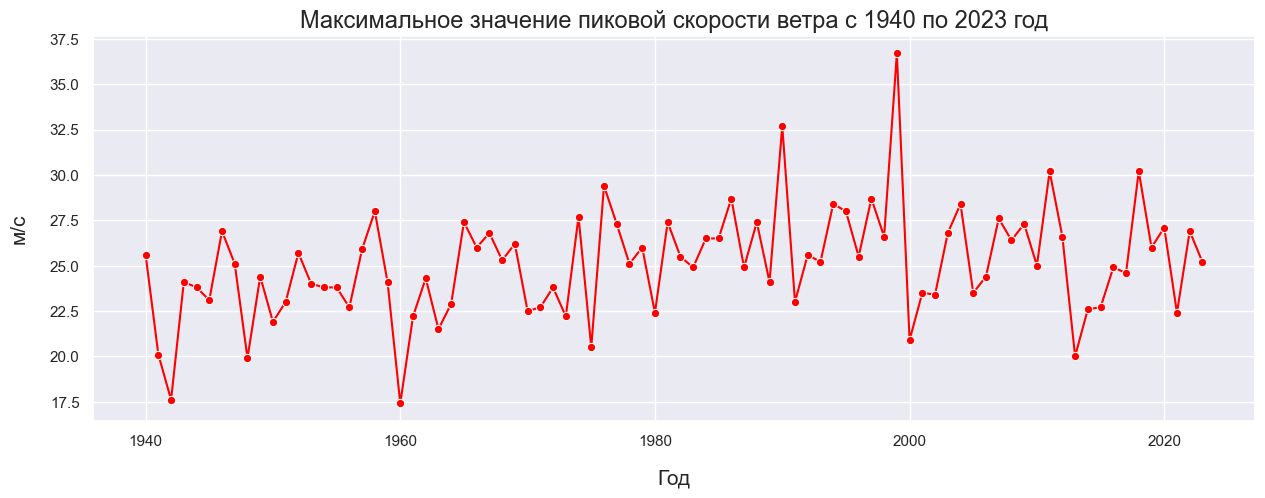

In [25]:
agg_df = df.groupby('Year')['Wind Gust'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Порывы ветра', value_name='Wind Gust')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение пиковой скорости ветра с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('м/с', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Wind Gust', hue='Порывы ветра', marker='o', data=melted_df, palette={'max': 'red'}, legend=False)

plt.show()

### *Среднее значение пиковой скорости ветра за каждый месяц* ###

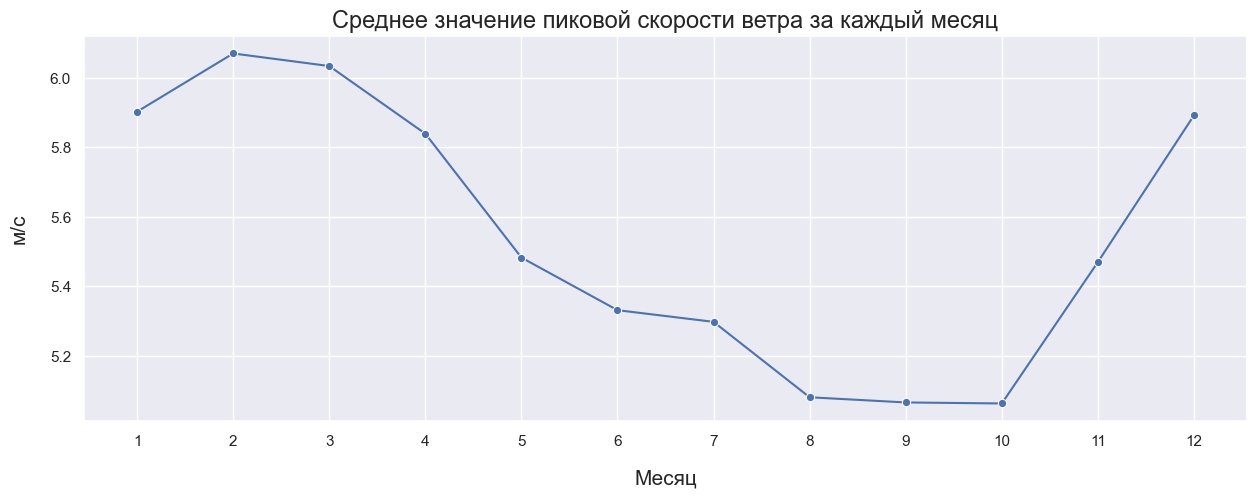

In [26]:
mean_wind_gust_every_month = df.groupby('Month')['Wind Gust'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение пиковой скорости ветра за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('м/с', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_wind_gust_every_month['Month'], rotation=0)

sns.lineplot(x=mean_wind_gust_every_month['Month'], y=mean_wind_gust_every_month['Wind Gust'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Скорость ветра (м/с):*</span> ###
- Уровень: 10 м.
- Средняя скорость ветра на уровне 10 метров от земли.

### <span style="color:#8ACDD7;">*Направление ветра (°):*</span> ###
- Уровень: 10 м.
- Направление, с которого дует ветер

### *Среднее значение скорости ветра на уровне 10 м. с 1940 по 2023 год* ###

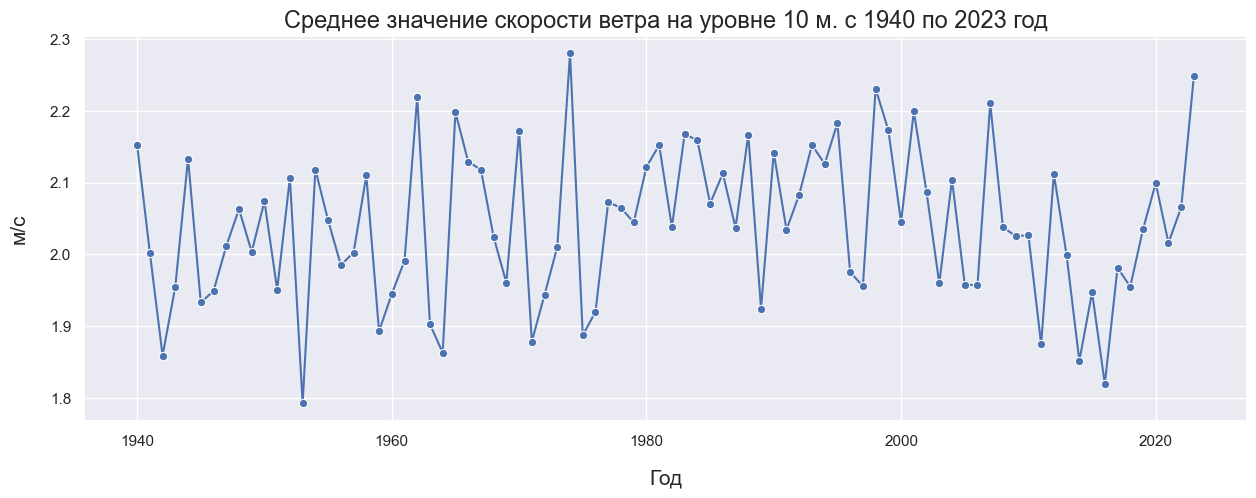

In [27]:
mean_wind_speed_10m_by_year = df.groupby('Year')['Wind Speed [10 m]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение скорости ветра на уровне 10 м. с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('м/с', fontsize=15, labelpad=15)

sns.lineplot(x=mean_wind_speed_10m_by_year['Year'], y=mean_wind_speed_10m_by_year['Wind Speed [10 m]'], marker='o')

plt.show()

### *Максимальное значение скорости ветра на уровне 10 м. с 1940 по 2023 год* ###

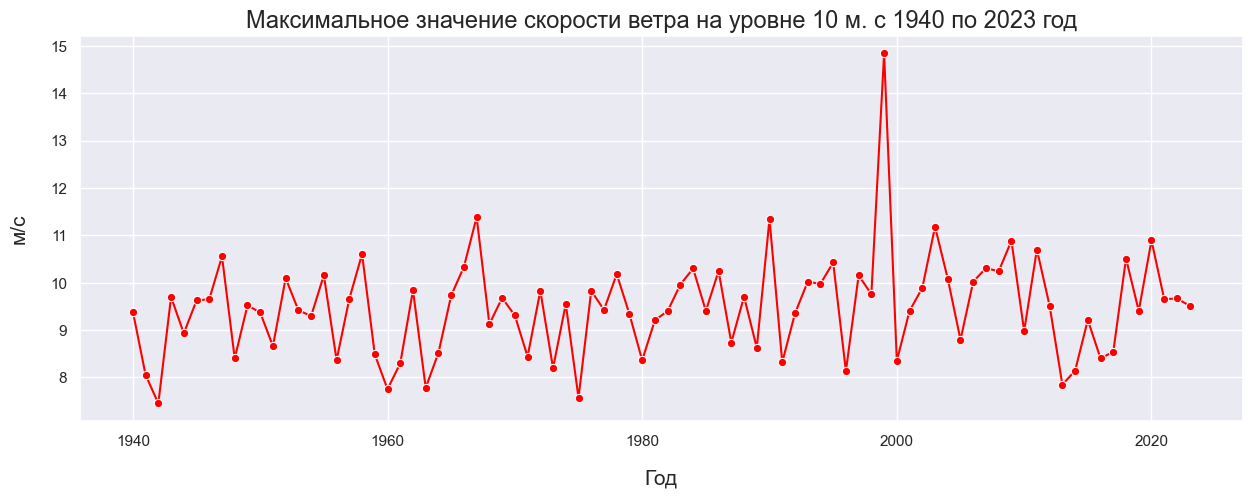

In [28]:
agg_df = df.groupby('Year')['Wind Speed [10 m]'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Скорость ветра', value_name='Wind Speed [10 m]')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение скорости ветра на уровне 10 м. с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('м/с', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Wind Speed [10 m]', hue='Скорость ветра', marker='o', data=melted_df, palette={'max': 'red'}, legend=False)

plt.show()

### *Среднее значение скорости ветра на уровне 10 м. за каждый месяц* ###

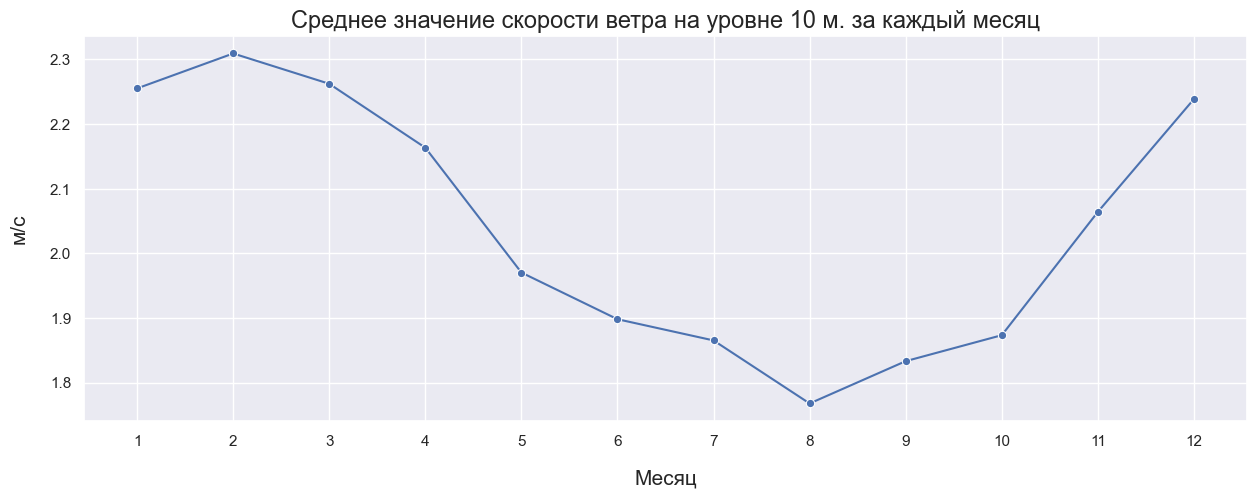

In [29]:
mean_wind_speed_10m_every_month = df.groupby('Month')['Wind Speed [10 m]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение скорости ветра на уровне 10 м. за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('м/с', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_wind_speed_10m_every_month['Month'], rotation=0)

sns.lineplot(x=mean_wind_speed_10m_every_month['Month'], y=mean_wind_speed_10m_every_month['Wind Speed [10 m]'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Скорость ветра (м/с):*</span> ###
- Уровень: 100 м.
- Средняя скорость ветра на уровне 100 метров от земли.

### <span style="color:#8ACDD7;">*Направление ветра (°):*</span> ###
- Уровень: 100 м.
- Направление, с которого дует ветер

### *Среднее значение скорости ветра на уровне 100 м. с 1940 по 2023 год* ###

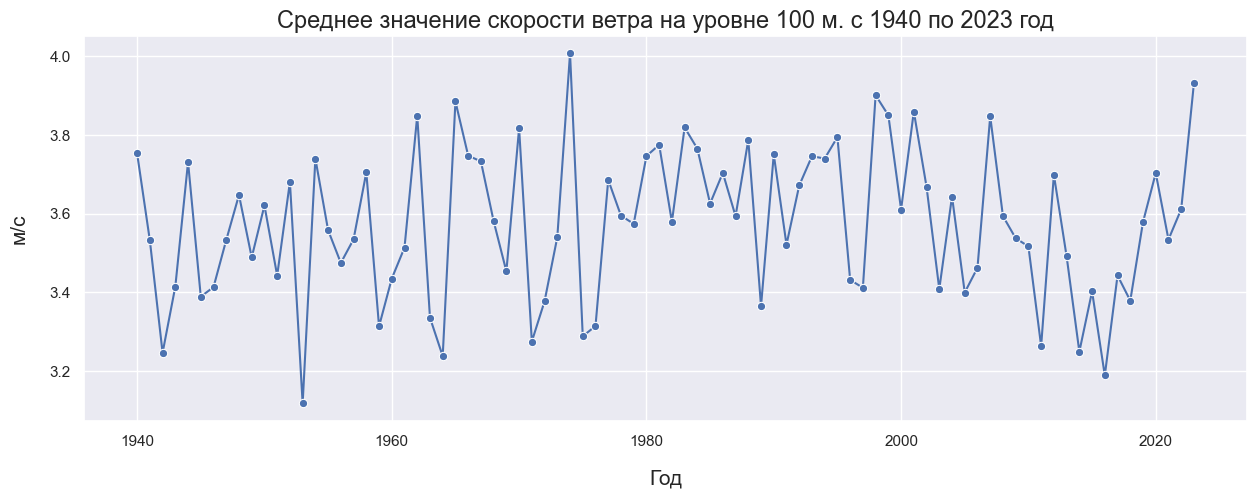

In [30]:
mean_wind_speed_100m_by_year = df.groupby('Year')['Wind Speed [100 m]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение скорости ветра на уровне 100 м. с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('м/с', fontsize=15, labelpad=15)

sns.lineplot(x=mean_wind_speed_100m_by_year['Year'], y=mean_wind_speed_100m_by_year['Wind Speed [100 m]'], marker='o')

plt.show()

### *Максимальное значение скорости ветра на уровне 100 м. с 1940 по 2023 год* ###

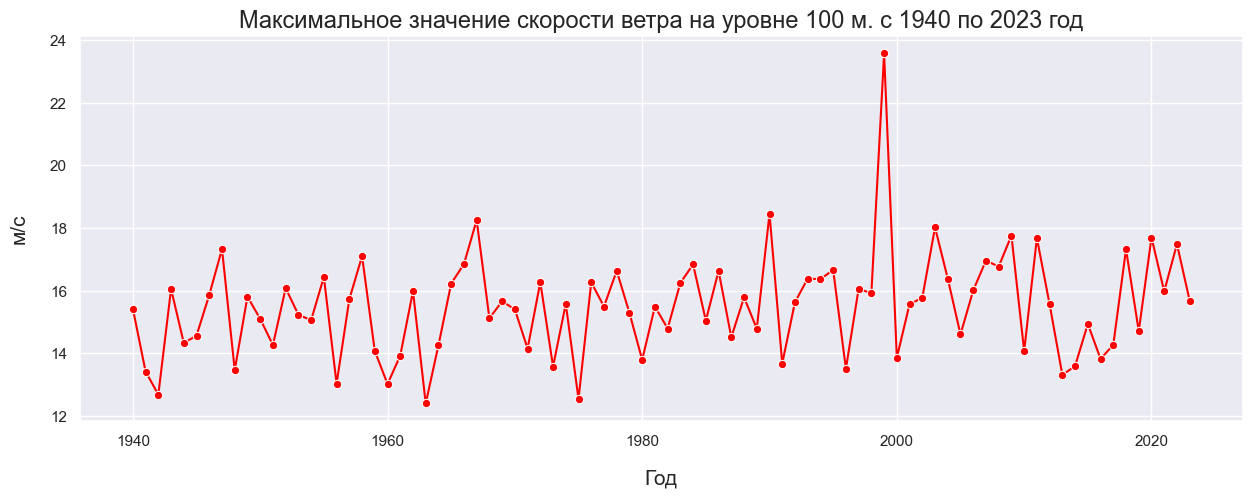

In [31]:
agg_df = df.groupby('Year')['Wind Speed [100 m]'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Скорость ветра', value_name='Wind Speed [100 m]')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение скорости ветра на уровне 100 м. с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('м/с', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Wind Speed [100 m]', hue='Скорость ветра', marker='o', data=melted_df, palette={'max': 'red'}, legend=False)

plt.show()

### *Среднее значение скорости ветра на уровне 100 м. за каждый месяц* ###

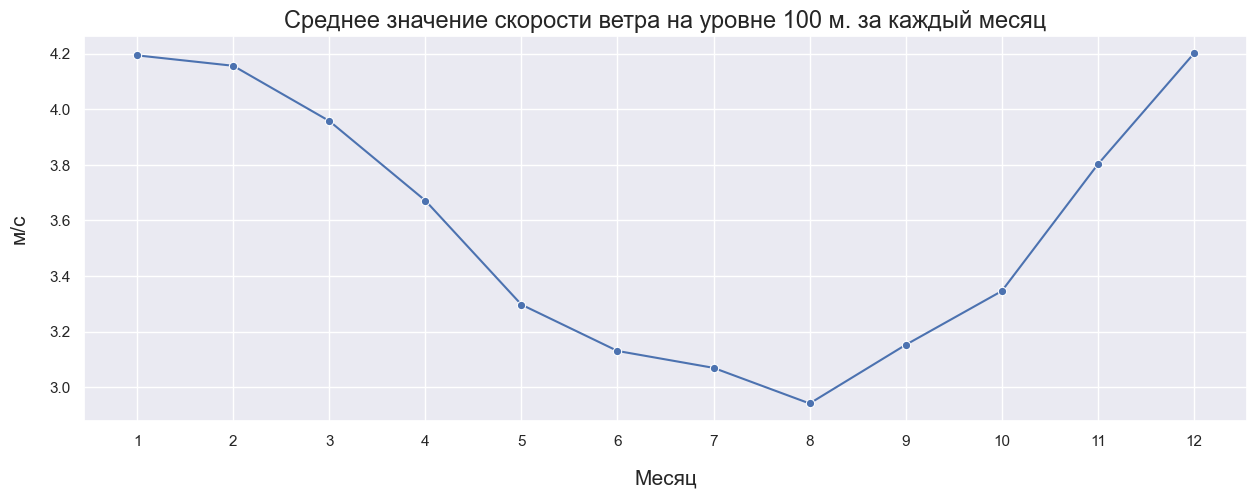

In [32]:
mean_wind_speed_100m_every_month = df.groupby('Month')['Wind Speed [100 m]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение скорости ветра на уровне 100 м. за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('м/с', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_wind_speed_100m_every_month['Month'], rotation=0)

sns.lineplot(x=mean_wind_speed_100m_every_month['Month'], y=mean_wind_speed_100m_every_month['Wind Speed [100 m]'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Скорость ветра (м/с):*</span> ###
- Уровень - 900 мб., 850 мб., 800 мб., 700 мб., 500 мб., 250 мб.
- Скорость ветра при различных уровнях атмосферного давления

### <span style="color:#8ACDD7;">*Направление ветра (°):*</span> ###
- Уровень - 900 мб., 850 мб., 800 мб., 700 мб., 500 мб., 250 мб.
- Направление, с которого дует ветер

### *Распределение значения скорости ветра при различном атмосферном давлении* ###

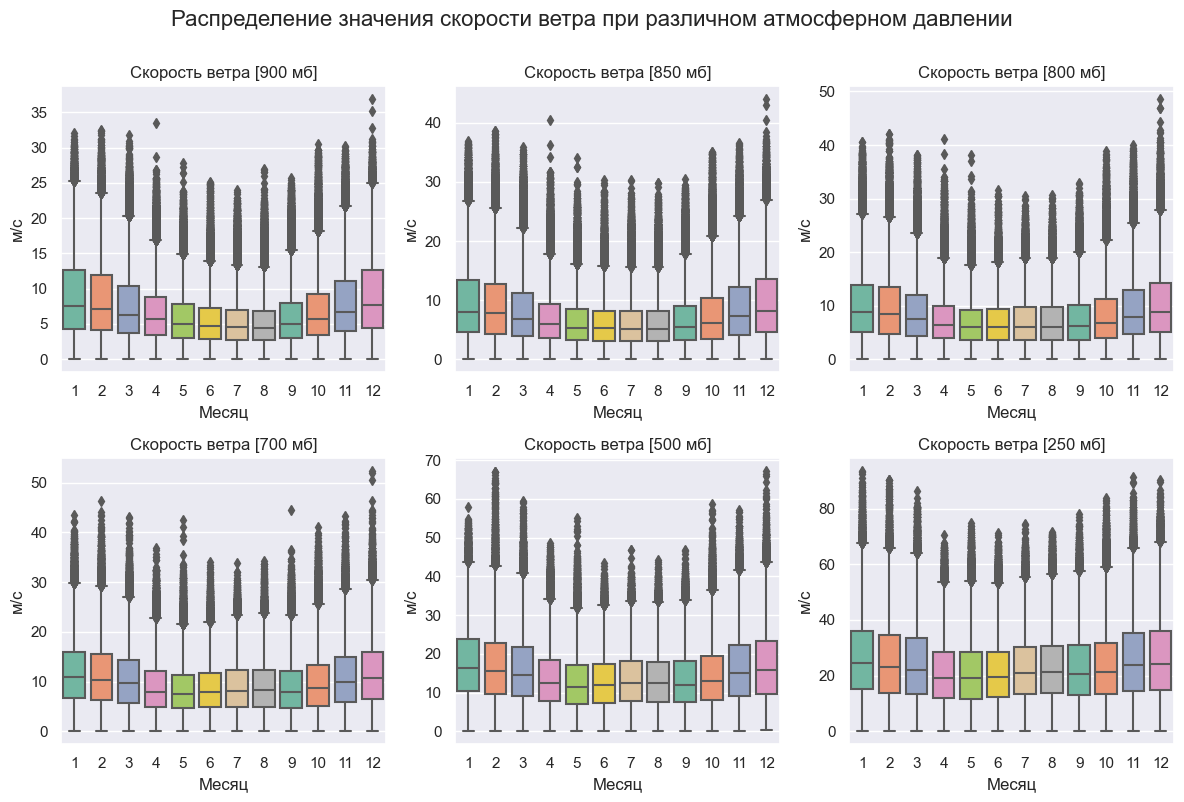

In [33]:
columns_list = ['Wind Speed [900 mb]', 
                'Wind Speed [850 mb]', 
                'Wind Speed [800 mb]', 
                'Wind Speed [700 mb]', 
                'Wind Speed [500 mb]', 
                'Wind Speed [250 mb]']

columns_dict = {'Wind Speed [900 mb]':'Скорость ветра [900 мб]', 
                'Wind Speed [850 mb]':'Скорость ветра [850 мб]', 
                'Wind Speed [800 mb]':'Скорость ветра [800 мб]', 
                'Wind Speed [700 mb]':'Скорость ветра [700 мб]', 
                'Wind Speed [500 mb]':'Скорость ветра [500 мб]', 
                'Wind Speed [250 mb]':'Скорость ветра [250 мб]'}

rows = 2
cols = (len(columns_list) + rows - 1) // rows

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 4 * rows))

for i, column in enumerate(columns_list):
    ax = axes[i // cols, i % cols]
    sns.boxplot(data=df, x='Month', y=column, palette='Set2', ax=ax)
    ax.set_title(columns_dict[column])
    ax.set_xlabel('Месяц')
    ax.set_ylabel('м/с')

plt.suptitle('Распределение значения скорости ветра при различном атмосферном давлении', y=1.00, fontsize=16)
plt.tight_layout()

### *График взаимосвязи направления и скорости ветра* ###

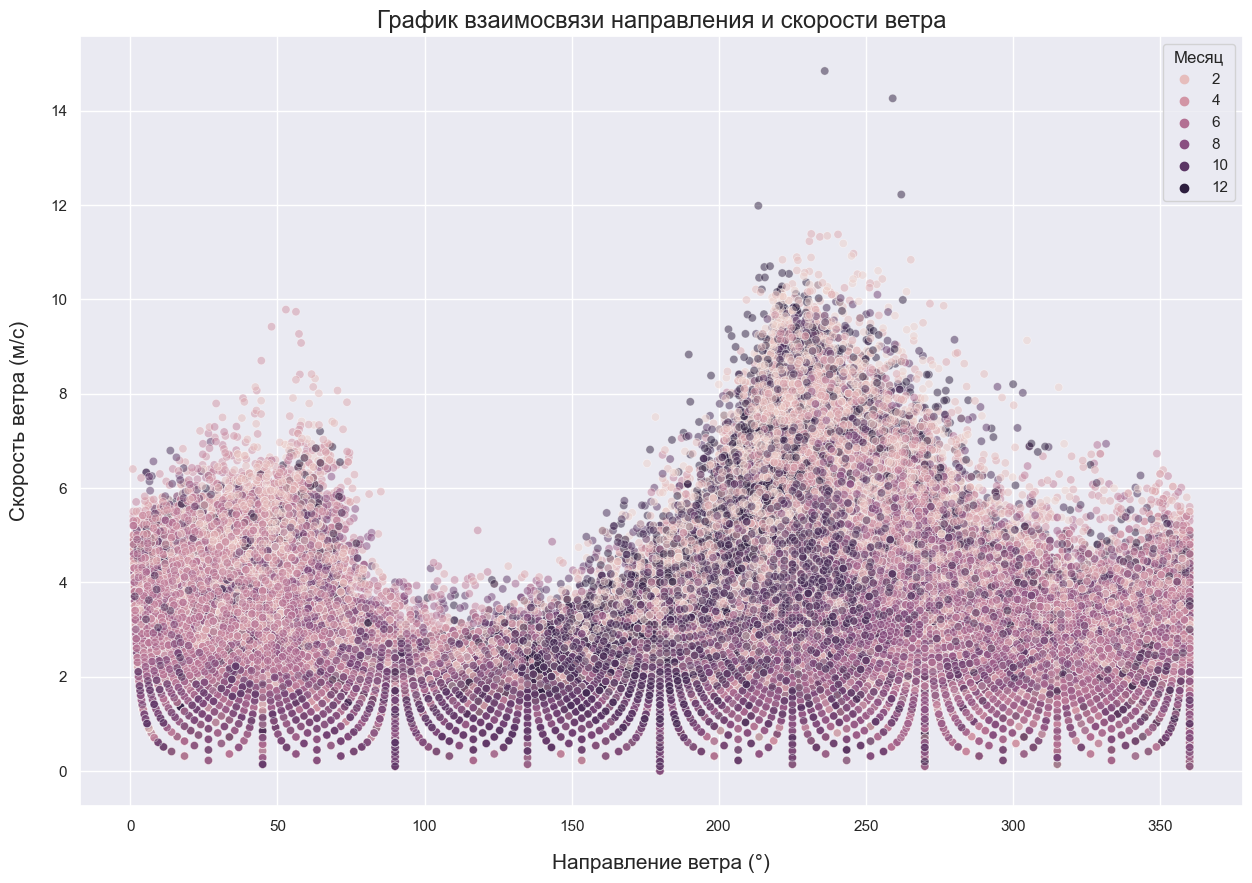

In [34]:
plt.figure(figsize=(15, 10))
plt.title('График взаимосвязи направления и скорости ветра', fontsize=17)
plt.xlabel('Направление ветра (°)', fontsize=15, labelpad=15)
plt.ylabel('Скорость ветра (м/с)', fontsize=15, labelpad=15)

scatterplot = sns.scatterplot(x='Wind Direction [10 m]', y='Wind Speed [10 m]', data=df, hue='Month', alpha=0.5)
scatterplot.legend(title='Месяц')

plt.show()

### <span style="color:#8ACDD7;">*Общая облачность (%):*</span> ###
- Уровень - поверхность
- Часть неба, покрытая облаками (представление об общей облачности у поверхности земли)

### *Среднее значение облачности с 1940 по 2023 год* ###

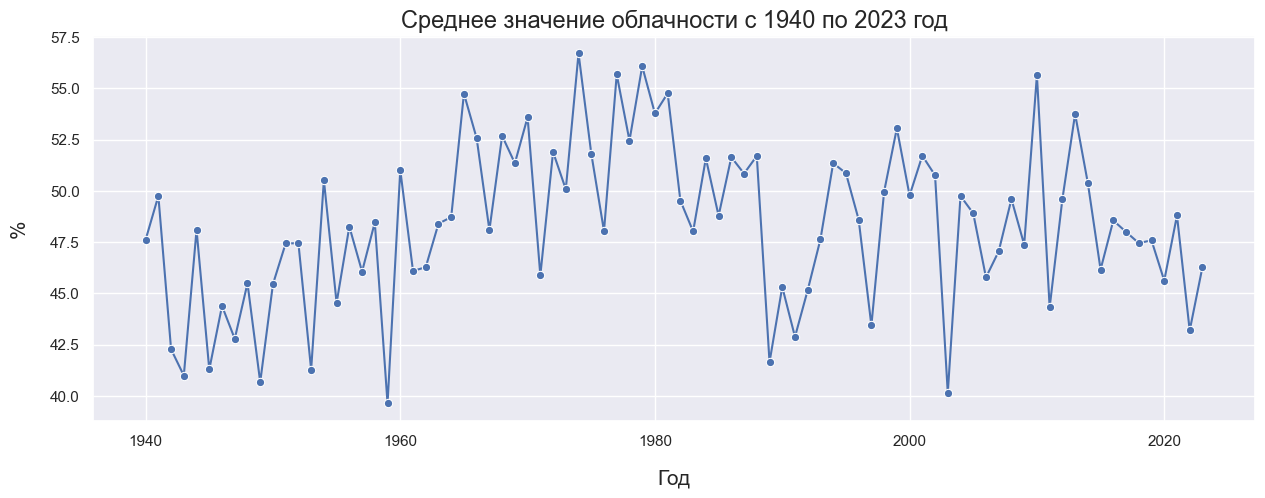

In [35]:
mean_cloud_cover_total_by_year = df.groupby('Year')['Cloud Cover Total'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение облачности с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('%', fontsize=15, labelpad=15)

sns.lineplot(x=mean_cloud_cover_total_by_year['Year'], y=mean_cloud_cover_total_by_year['Cloud Cover Total'], marker='o')

plt.show()

### *Среднее значение облачности за каждый месяц* ###

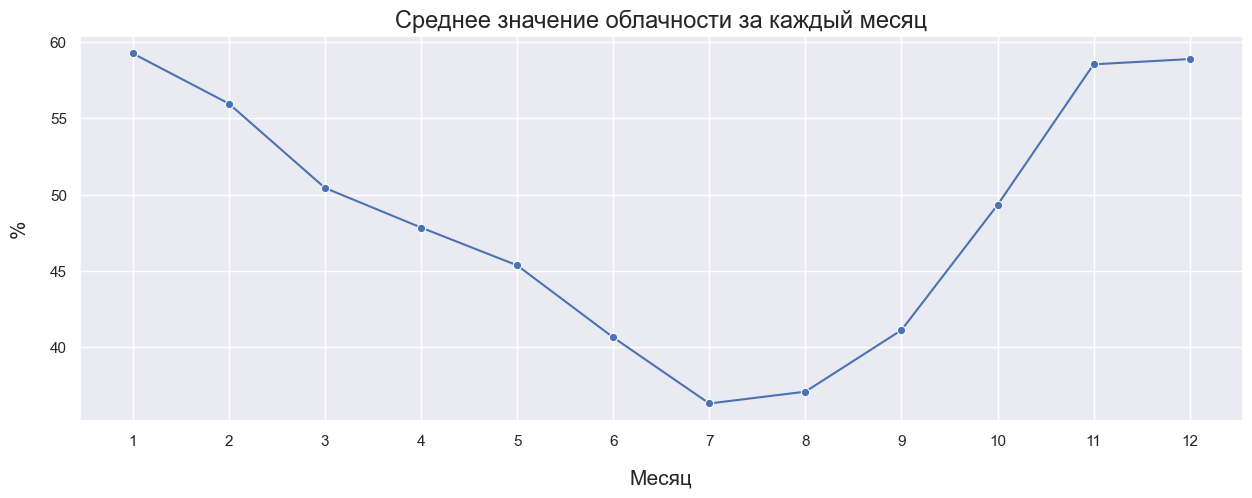

In [36]:
mean_cloud_cover_total_every_month = df.groupby('Month')['Cloud Cover Total'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение облачности за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('%', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_cloud_cover_total_every_month['Month'], rotation=0)

sns.lineplot(x=mean_cloud_cover_total_every_month['Month'], y=mean_cloud_cover_total_every_month['Cloud Cover Total'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Облачность на высоком слое (%):*</span> ###
- Уровень - высокий облачный слой
- Часть неба, покрытая облаками на более высоких уровнях, в частности в слое высокой облачности

### *Среднее значение  облачности на высоком слое с 1940 по 2023 год* ###

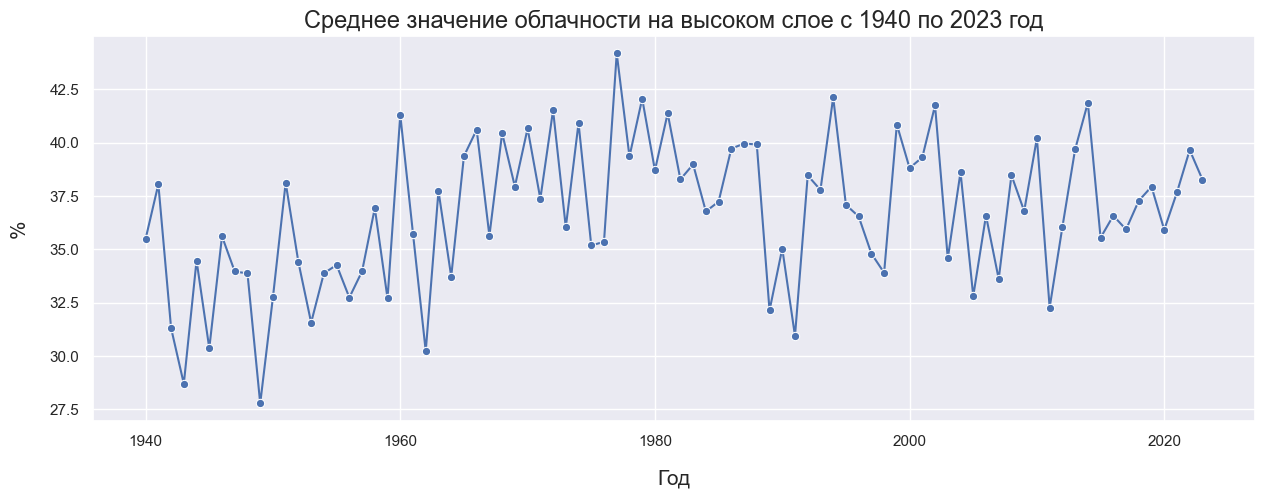

In [37]:
mean_cloud_cover_high_by_year = df.groupby('Year')['Cloud Cover High [high cld lay]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение облачности на высоком слое с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('%', fontsize=15, labelpad=15)

sns.lineplot(x=mean_cloud_cover_high_by_year['Year'], y=mean_cloud_cover_high_by_year['Cloud Cover High [high cld lay]'], marker='o')

plt.show()

### *Среднее значение облачности на высоком слое за каждый месяц* ###

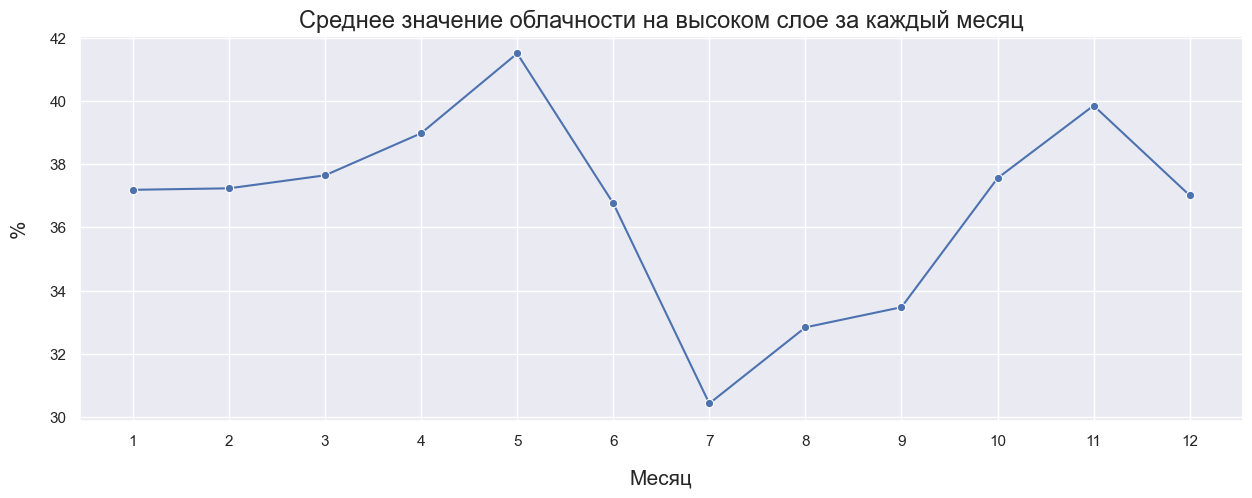

In [38]:
mean_cloud_cover_high_every_month = df.groupby('Month')['Cloud Cover High [high cld lay]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение облачности на высоком слое за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('%', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_cloud_cover_high_every_month['Month'], rotation=0)

sns.lineplot(x=mean_cloud_cover_high_every_month['Month'], y=mean_cloud_cover_high_every_month['Cloud Cover High [high cld lay]'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Облачность на среднем слое (%):*</span> ###
- Уровень - среднем облачный слой
- Часть неба, покрытая облаками на более средних уровнях, в частности в слое средней облачности

### *Среднее значение облачности на среднем слое с 1940 по 2023 год* ###

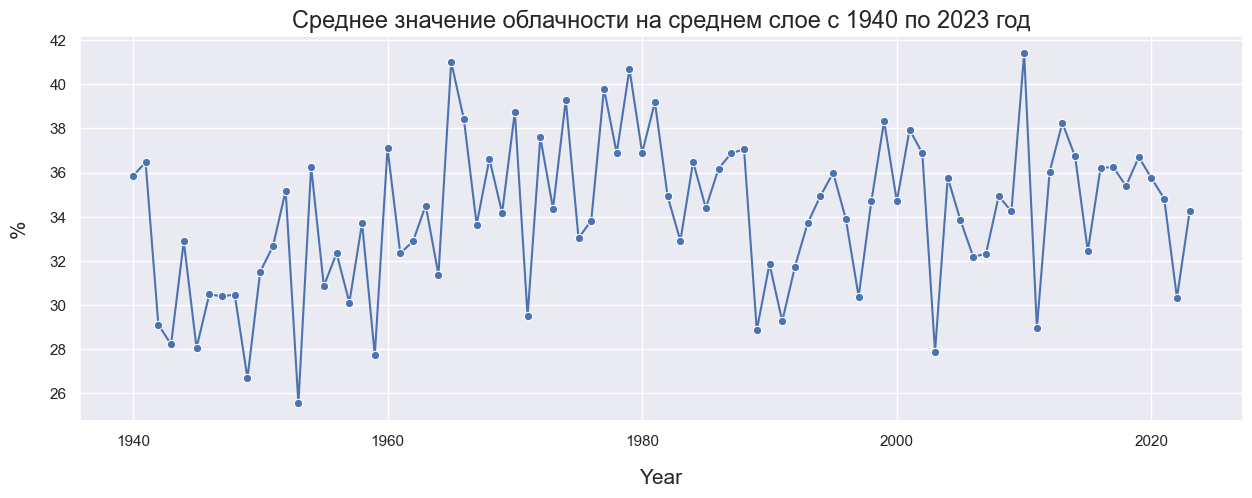

In [39]:
mean_cloud_cover_medium_by_year = df.groupby('Year')['Cloud Cover Medium [mid cld lay]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение облачности на среднем слое с 1940 по 2023 год', fontsize=17)
plt.xlabel('Year', fontsize=15, labelpad=15)
plt.ylabel('%', fontsize=15, labelpad=15)

sns.lineplot(x=mean_cloud_cover_medium_by_year['Year'], y=mean_cloud_cover_medium_by_year['Cloud Cover Medium [mid cld lay]'], marker='o')

plt.show()

### *Среднее значение  облачности на среднем слое за каждый месяц* ###

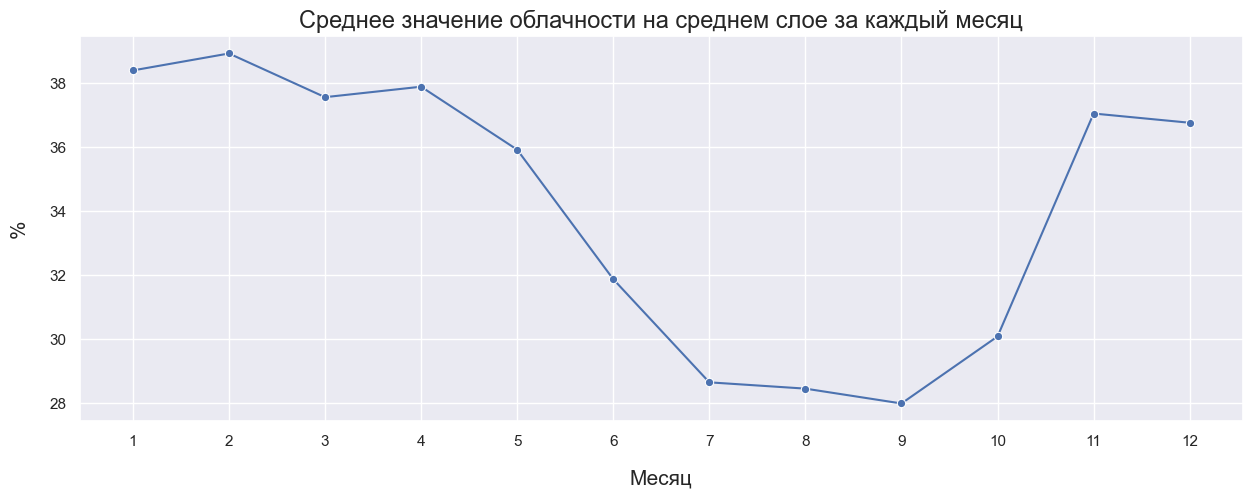

In [40]:
mean_cloud_cover_medium_every_month = df.groupby('Month')['Cloud Cover Medium [mid cld lay]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение облачности на среднем слое за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('%', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_cloud_cover_medium_every_month['Month'], rotation=0)

sns.lineplot(x=mean_cloud_cover_medium_every_month['Month'], y=mean_cloud_cover_medium_every_month['Cloud Cover Medium [mid cld lay]'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Облачность на низком слое (%):*</span> ###
- Уровень - низкий облачный слой
- Часть неба, покрытая облаками на более низких уровнях, в частности в слое низкой облачности

### *Среднее значение  облачности на низком слое с 1940 по 2023 год* ###

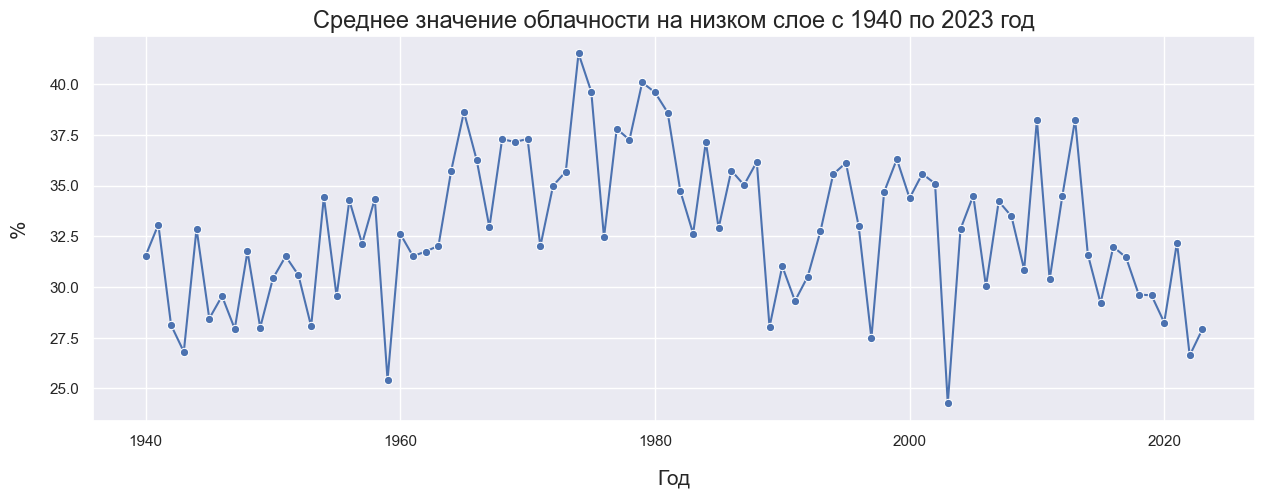

In [41]:
mean_cloud_cover_low_by_year = df.groupby('Year')['Cloud Cover Low [low cld lay]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение облачности на низком слое с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('%', fontsize=15, labelpad=15)

sns.lineplot(x=mean_cloud_cover_low_by_year['Year'], y=mean_cloud_cover_low_by_year['Cloud Cover Low [low cld lay]'], marker='o')

plt.show()

### *Среднее значение  облачности на низком слое за каждый месяц* ###

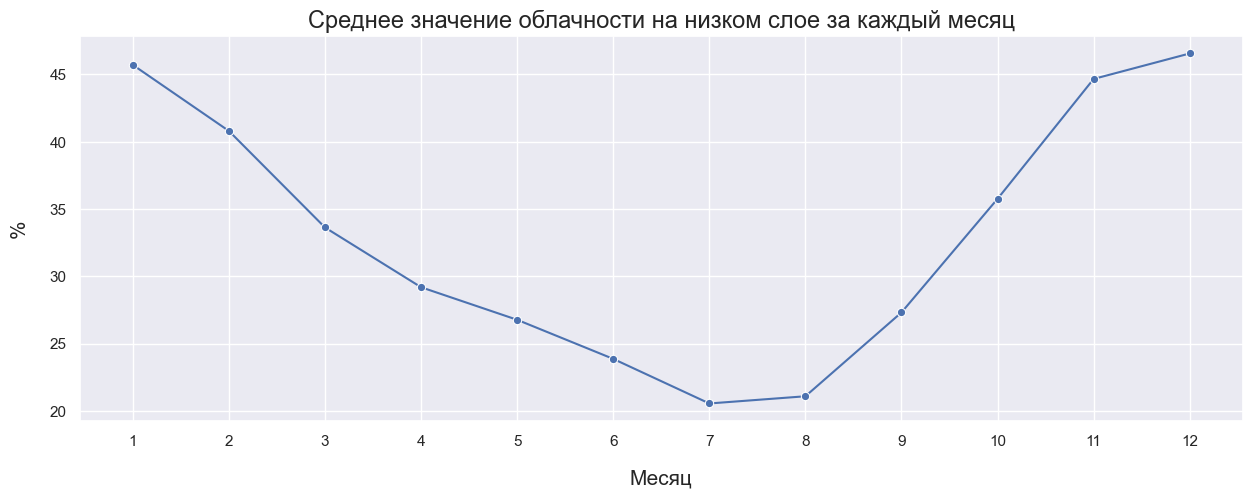

In [42]:
mean_cloud_cover_low_every_month = df.groupby('Month')['Cloud Cover Low [low cld lay]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение облачности на низком слое за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('%', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_cloud_cover_low_every_month['Month'], rotation=0)

sns.lineplot(x=mean_cloud_cover_low_every_month['Month'], y=mean_cloud_cover_low_every_month['Cloud Cover Low [low cld lay]'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Конвективная доступная потенциальная энергия (CAPE) (Дж/кг):*</span> ###
- Уровень - атмосферный столб от 180 мб. до поверхности (0 мб.) над уровнем земли
- Количество энергии, доступной для вертикальной конвекции в атмосфере

### *Среднее значение  конвективной доступной потенциальной энергии с 1940 по 2023 год* ###

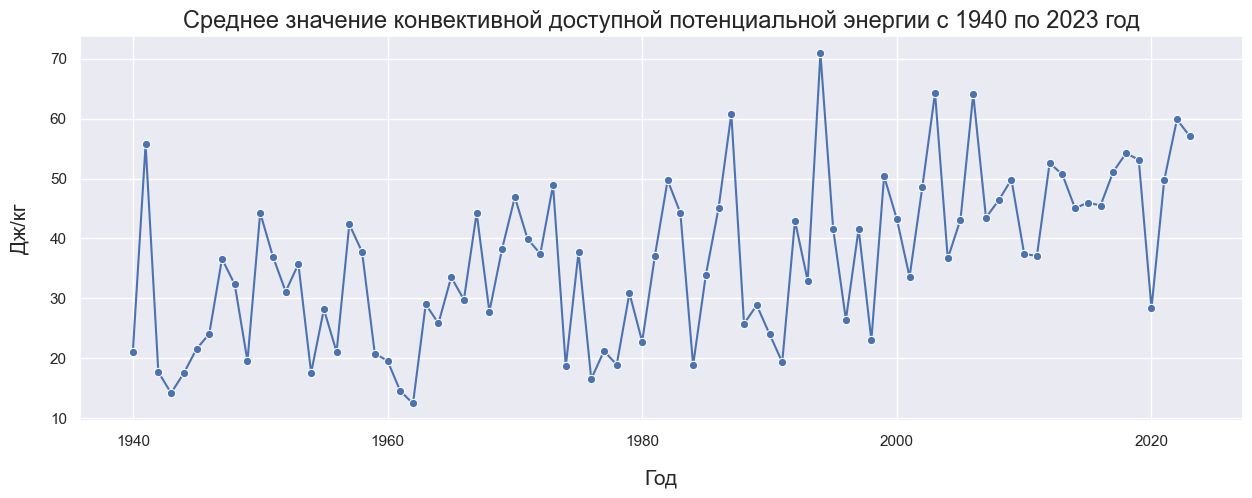

In [43]:
mean_cape_by_year = df.groupby('Year')['CAPE [180-0 mb above gnd]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение конвективной доступной потенциальной энергии с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Дж/кг', fontsize=15, labelpad=15)

sns.lineplot(x=mean_cape_by_year['Year'], y=mean_cape_by_year['CAPE [180-0 mb above gnd]'], marker='o')

plt.show()

### *Максимальное значение конвективной доступной потенциальной энергии с 1940 по 2023 год* ###

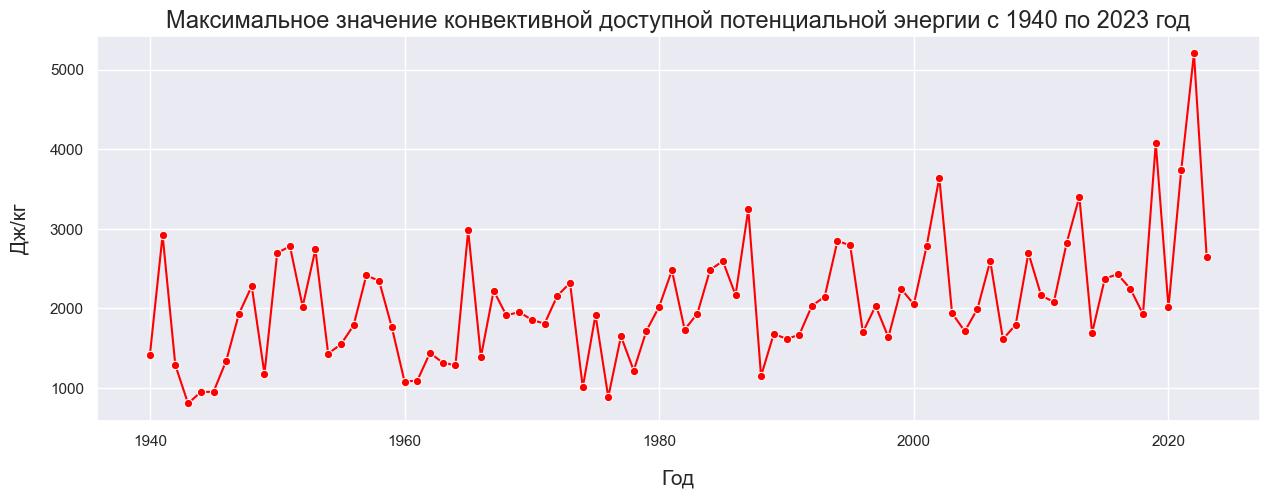

In [44]:
agg_df = df.groupby('Year')['CAPE [180-0 mb above gnd]'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='CAPE', value_name='CAPE [180-0 mb above gnd]')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение конвективной доступной потенциальной энергии с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Дж/кг', fontsize=15, labelpad=15)

lineplot = sns.lineplot(x='Year', y='CAPE [180-0 mb above gnd]', hue='CAPE', marker='o', data=melted_df, palette={'max': 'red'}, legend=False)

plt.show()

### *Среднее значение конвективной доступной потенциальной энергии за каждый месяц* ###

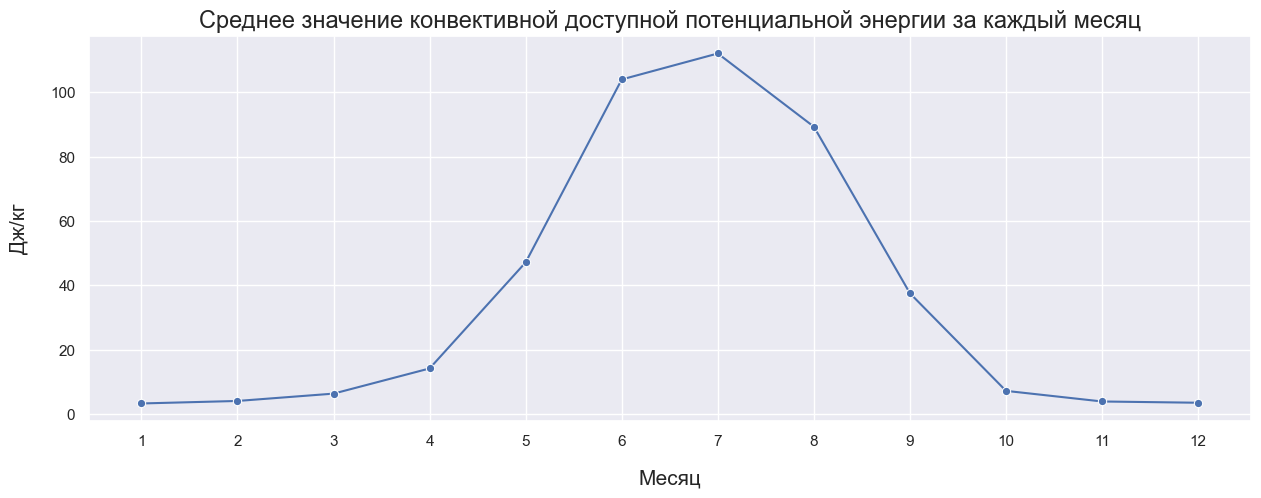

In [45]:
mean_cape_every_month = df.groupby('Month')['CAPE [180-0 mb above gnd]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение конвективной доступной потенциальной энергии за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('Дж/кг', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_cape_every_month['Month'], rotation=0)

sns.lineplot(x=mean_cape_every_month['Month'], y=mean_cape_every_month['CAPE [180-0 mb above gnd]'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Коротковолновое излучение (Вт/м^2):*</span> ###
- Уровень - поверхность
- Количество коротковолновой солнечной радиации, полученной на единицу площади на поверхности земли

### *Среднее значение коротковолнового излучения с 1940 по 2023 год* ###

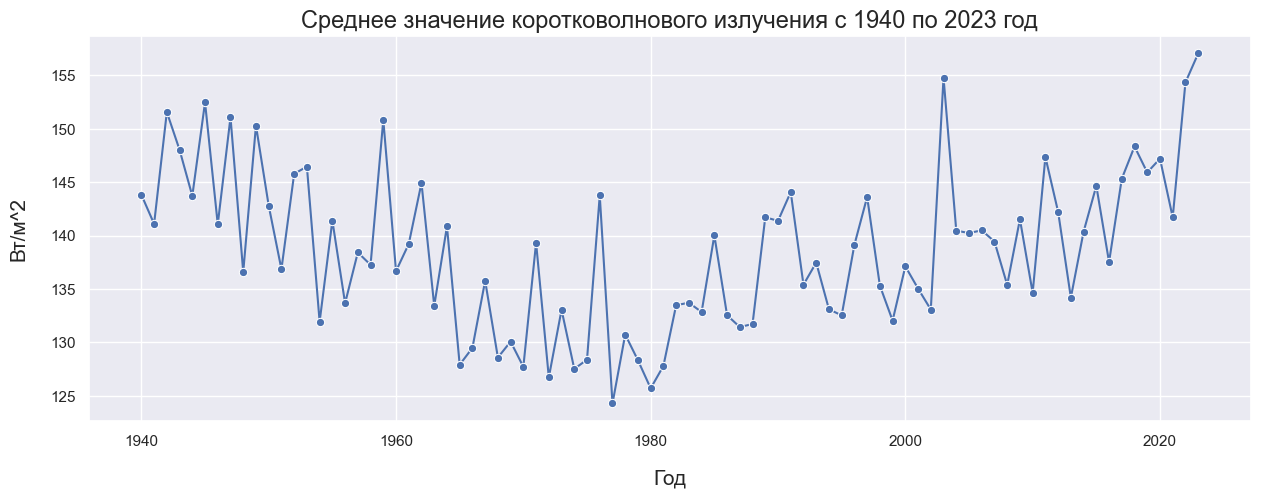

In [46]:
mean_shortwave_radiation_by_year = df.groupby('Year')['Shortwave Radiation'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение коротковолнового излучения с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)

sns.lineplot(x=mean_shortwave_radiation_by_year['Year'], y=mean_shortwave_radiation_by_year['Shortwave Radiation'], marker='o')

plt.show()

### *Максимальное значение коротковолнового излучения с 1940 по 2023 год* ###

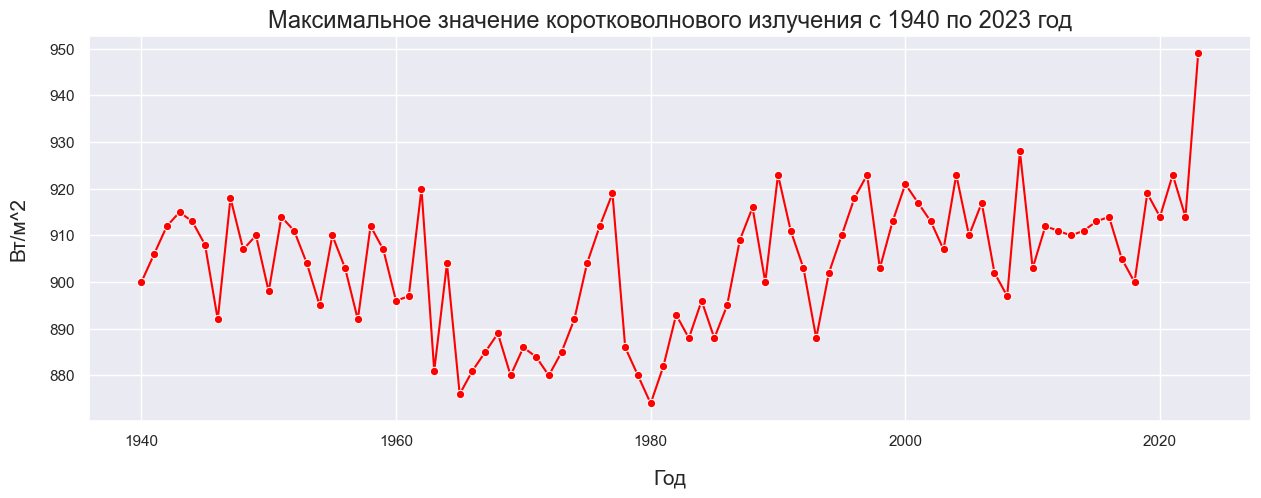

In [47]:
agg_df = df.groupby('Year')['Shortwave Radiation'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Shortwave radiation', value_name='Shortwave Radiation')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение коротковолнового излучения с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Shortwave Radiation', hue='Shortwave radiation', marker='o', data=melted_df, palette={'max': 'red'}, legend=False)

plt.show()

### *Среднее значение коротковолнового излучения за каждый месяц* ###

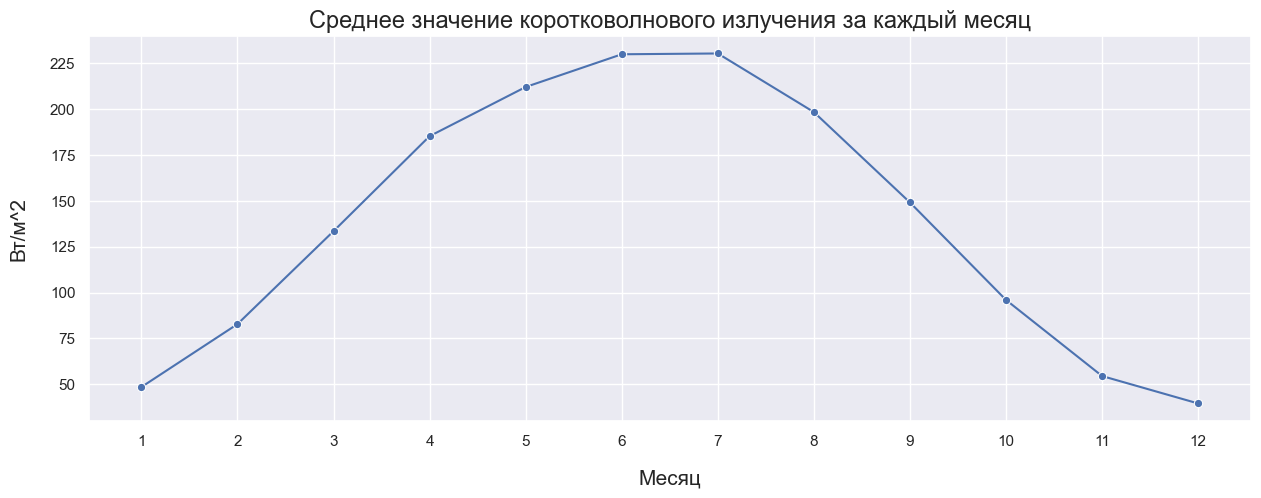

In [48]:
mean_shortwave_radiation_every_month = df.groupby('Month')['Shortwave Radiation'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение коротковолнового излучения за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_shortwave_radiation_every_month['Month'], rotation=0)

sns.lineplot(x=mean_shortwave_radiation_every_month['Month'], y=mean_shortwave_radiation_every_month['Shortwave Radiation'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Длинноволновое излучение (Вт/м^2):*</span> ###
- Уровень - поверхность
- Количество длинноволновой солнечной радиации, полученной на единицу площади на поверхности земли

### *Среднее значение длинноволнового излучения с 1940 по 2023 год* ###

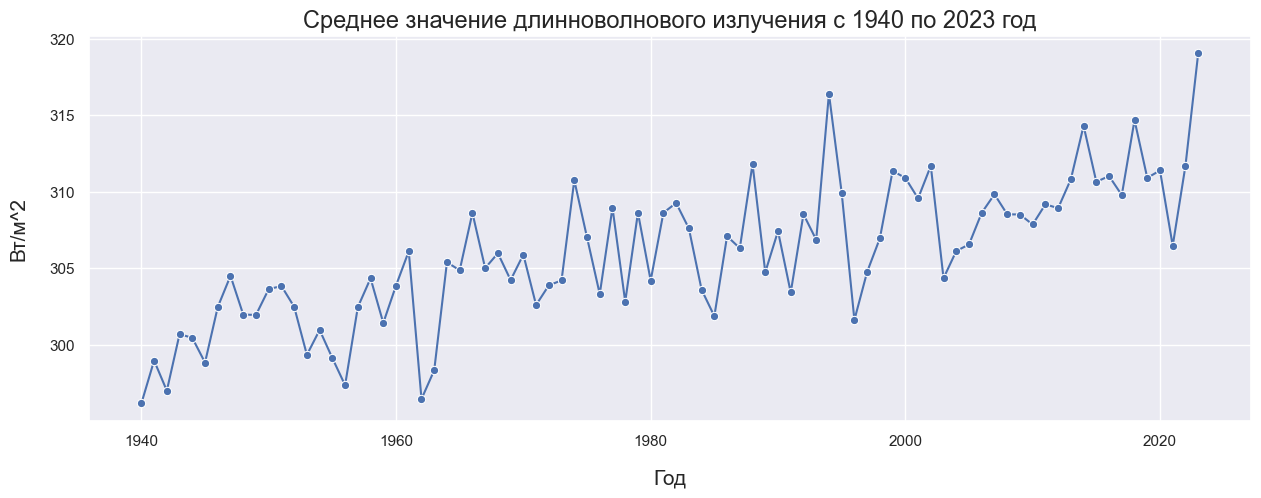

In [49]:
mean_longwave_radiation_by_year = df.groupby('Year')['Longwave Radiation'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение длинноволнового излучения с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)

sns.lineplot(x=mean_longwave_radiation_by_year['Year'], y=mean_longwave_radiation_by_year['Longwave Radiation'], marker='o')

plt.show()

### *Максимальное и минимальное значение длинноволнового излучения с 1940 по 2023 год* ###

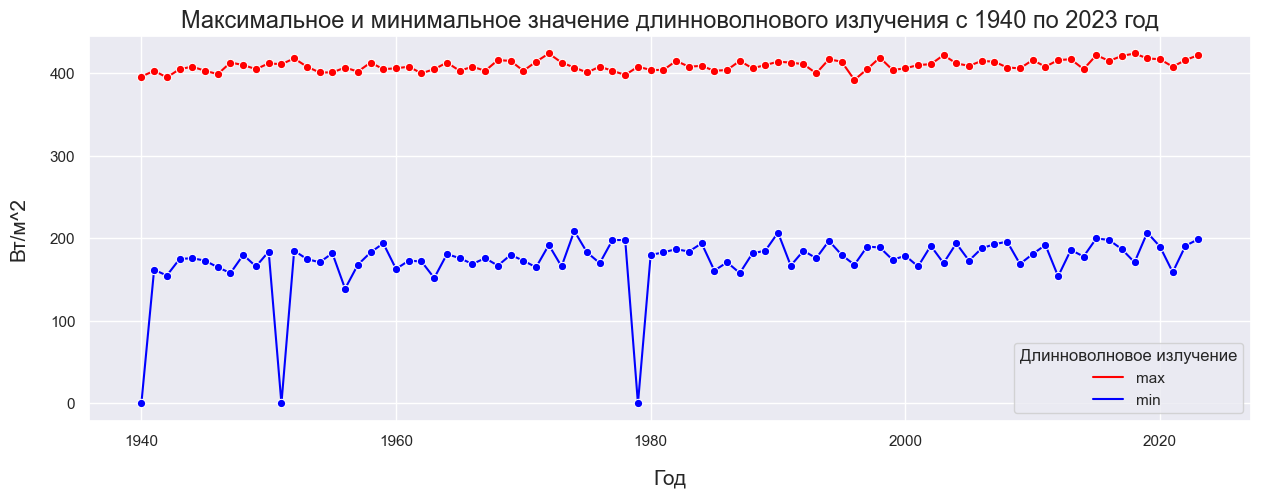

In [50]:
agg_df = df.groupby('Year')['Longwave Radiation'].agg(['max', 'min']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Длинноволновое излучение', value_name='Longwave Radiation')

plt.figure(figsize=(15, 5))
plt.title('Максимальное и минимальное значение длинноволнового излучения с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Longwave Radiation', hue='Длинноволновое излучение', marker='o', data=melted_df, palette={'max': 'red', 'min': 'blue'})

plt.show()

### *Среднее значение длинноволнового излучения за каждый месяц* ###

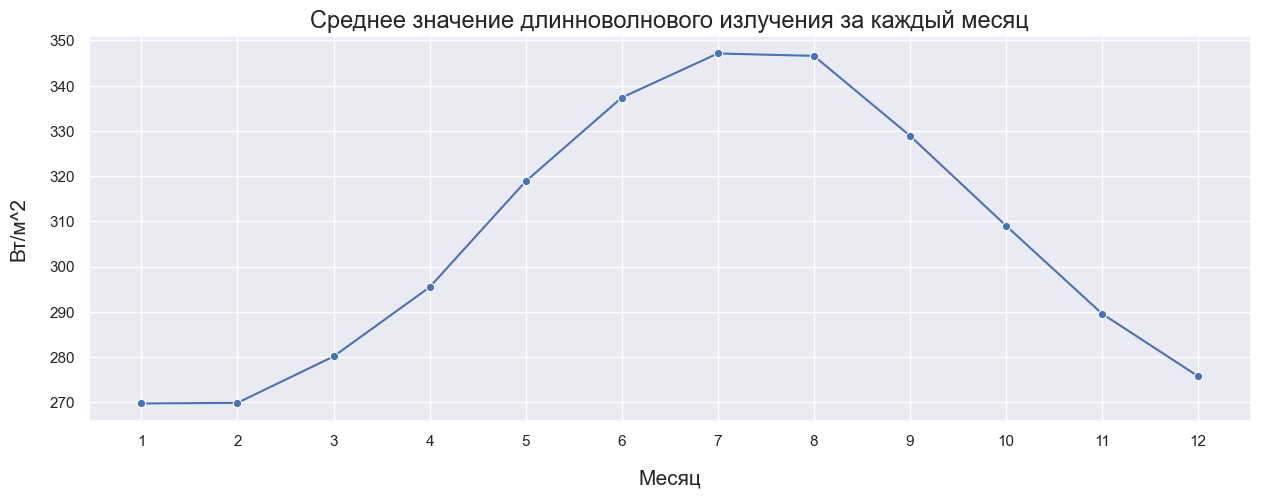

In [51]:
mean_longwave_radiation_every_month = df.groupby('Month')['Longwave Radiation'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение длинноволнового излучения за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_longwave_radiation_every_month['Month'], rotation=0)

sns.lineplot(x=mean_longwave_radiation_every_month['Month'], y=mean_longwave_radiation_every_month['Longwave Radiation'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*УФ-излучение (Вт/м^2):*</span> ###
- Уровень - поверхность
- Количество ультрафиолетового излучения на квадратный метр 

### *Среднее значение ультрафиолетового излучения с 1940 по 2023 год* ###

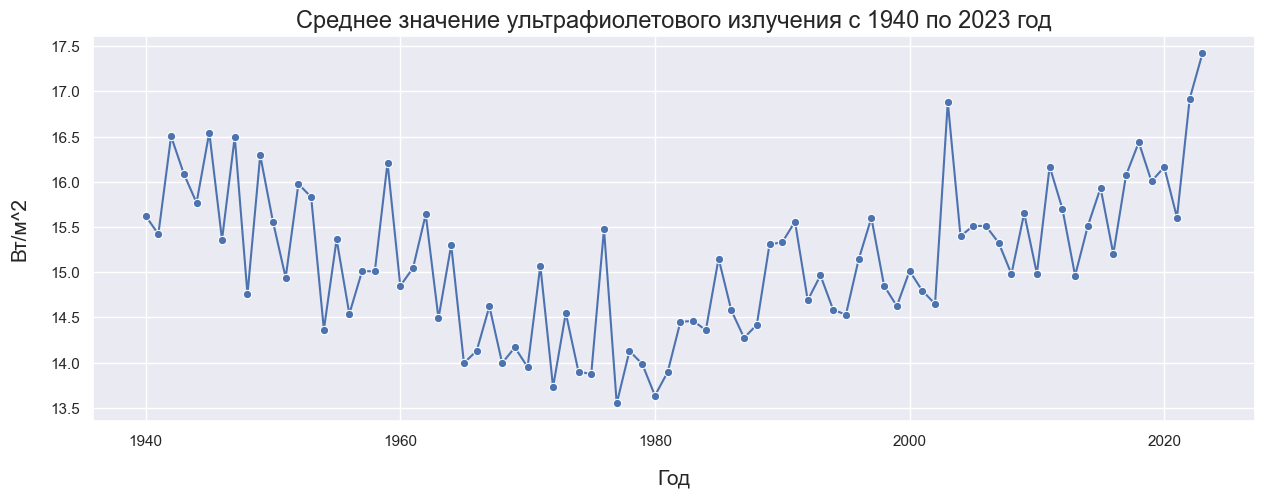

In [52]:
mean_uv_radiation_by_year = df.groupby('Year')['UV Radiation'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение ультрафиолетового излучения с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)

sns.lineplot(x=mean_uv_radiation_by_year['Year'], y=mean_uv_radiation_by_year['UV Radiation'], marker='o')

plt.show()

### *Максимальное значение ультрафиолетового излучения с 1940 по 2023 год* ###

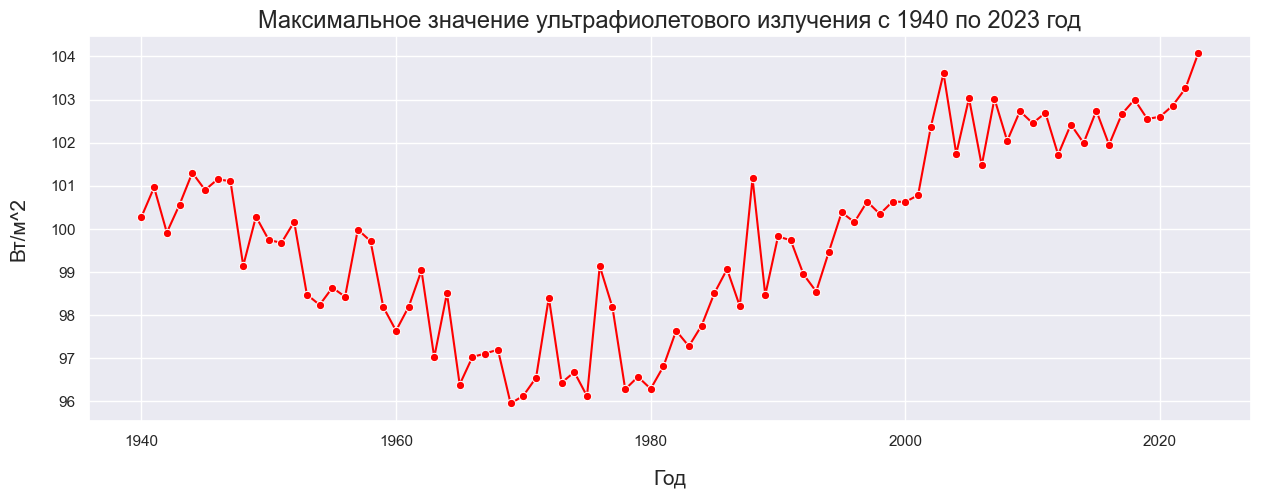

In [53]:
agg_df = df.groupby('Year')['UV Radiation'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='UV radiation', value_name='UV Radiation')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение ультрафиолетового излучения с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='UV Radiation', hue='UV radiation', marker='o', data=melted_df, palette={'max': 'red'}, legend=False)

plt.show()

### *Среднее значение ультрафиолевотого излучения за каждый месяц* ###

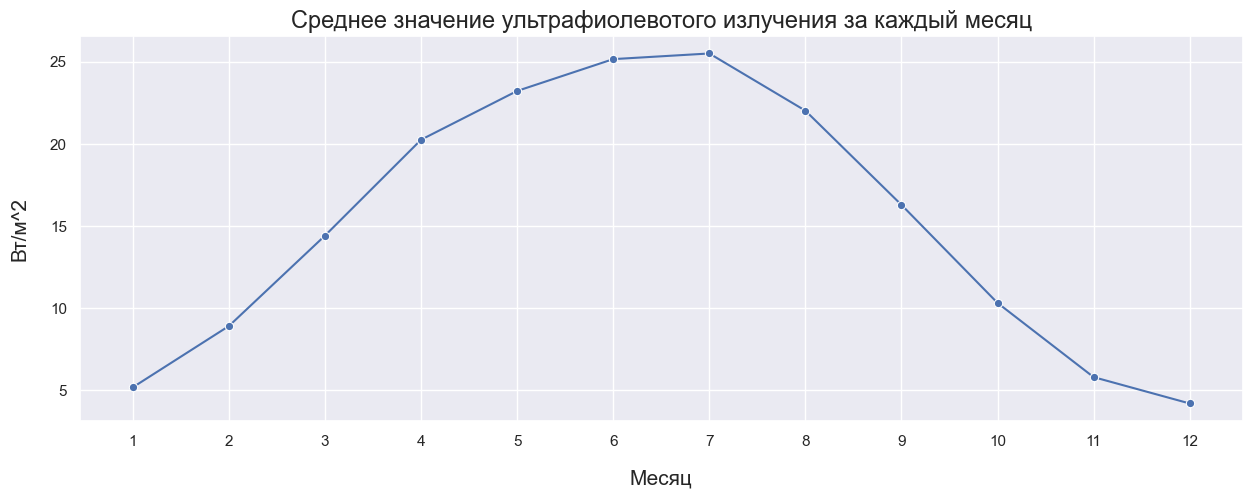

In [54]:
mean_uv_radiation_every_month = df.groupby('Month')['UV Radiation'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение ультрафиолевотого излучения за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_uv_radiation_every_month['Month'], rotation=0)

sns.lineplot(x=mean_uv_radiation_every_month['Month'], y=mean_uv_radiation_every_month['UV Radiation'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Прямое коротковолновое излучение (Вт/м^2):*</span> ###
- Уровень - поверхность
- Количество солнечного излучения, которое идет непосредственно от Солнца к Земле, не рассеиваясь и не отражаясь от атмосферы

### *Среднее значение прямого коротковолнового излучения с 1940 по 2023 год* ###

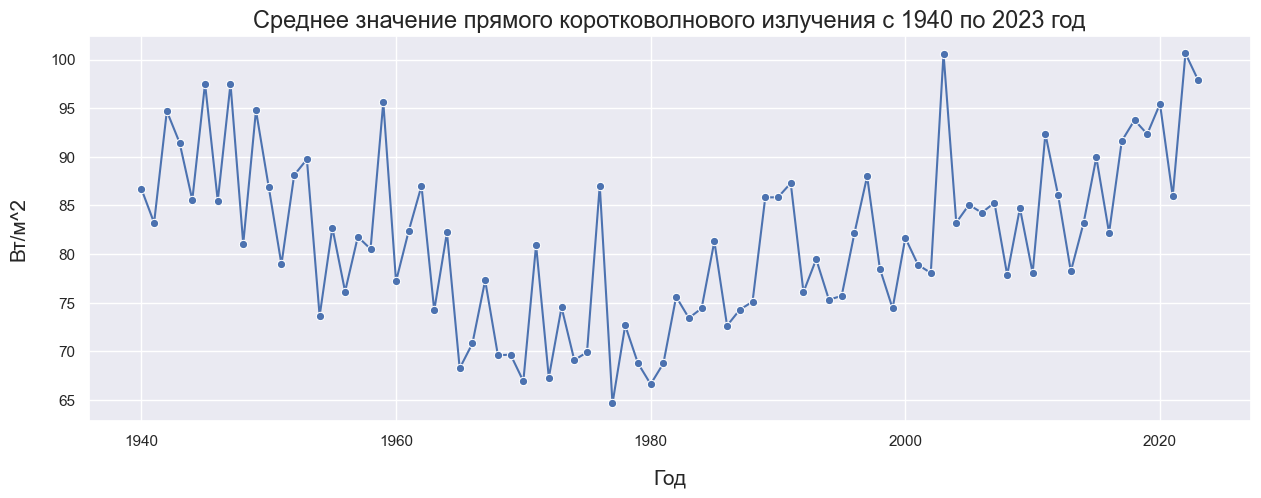

In [55]:
mean_direct_shortwave_radiation_by_year = df.groupby('Year')['Direct Shortwave Radiation'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение прямого коротковолнового излучения с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)

sns.lineplot(x=mean_direct_shortwave_radiation_by_year['Year'], y=mean_direct_shortwave_radiation_by_year['Direct Shortwave Radiation'], marker='o')

plt.show()

### *Максимальное значение прямого коротковолнового излучения с 1940 по 2023 год* ###

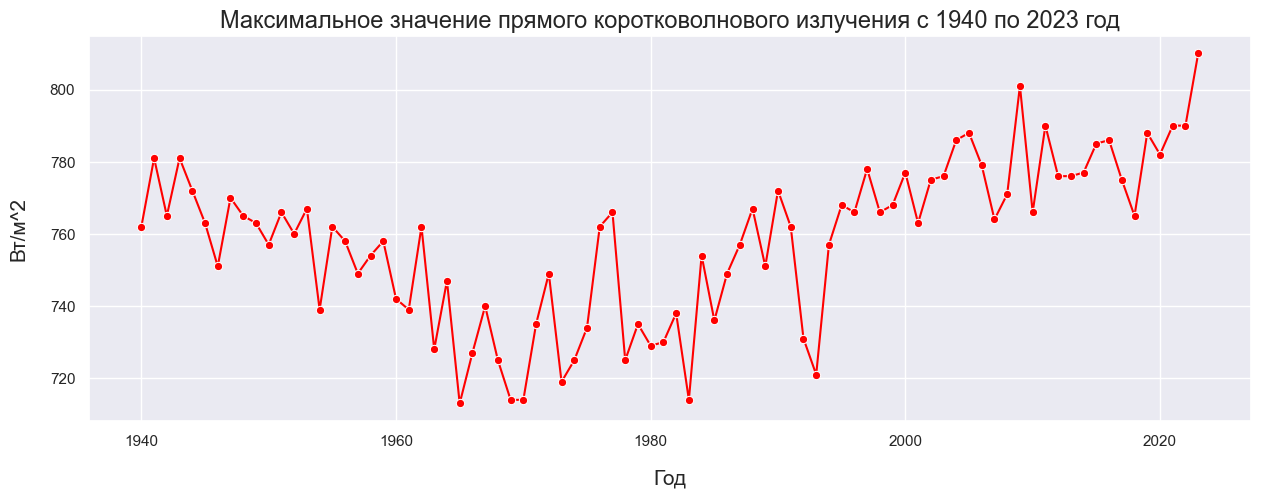

In [56]:
agg_df = df.groupby('Year')['Direct Shortwave Radiation'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Direct shortwave radiation', value_name='Direct Shortwave Radiation')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение прямого коротковолнового излучения с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Direct Shortwave Radiation', hue='Direct shortwave radiation', marker='o', data=melted_df, palette={'max': 'red'}, 
             legend=False)

plt.show()

### *Среднее значение прямого коротковолнового излучения за каждый месяц* ###

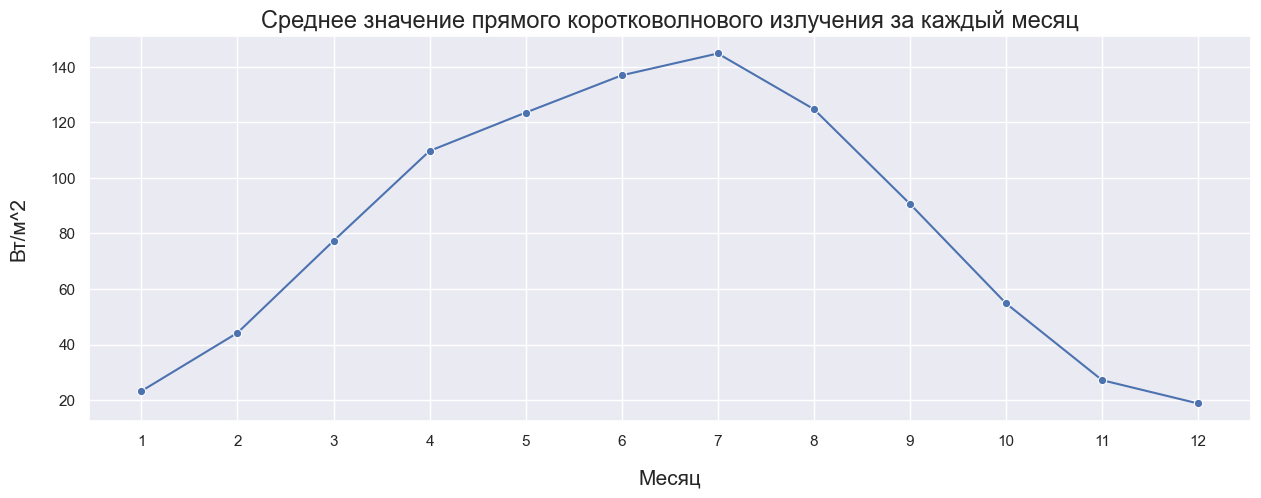

In [57]:
mean_direct_shortwave_radiation_every_month = df.groupby('Month')['Direct Shortwave Radiation'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение прямого коротковолнового излучения за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_direct_shortwave_radiation_every_month['Month'], rotation=0)

sns.lineplot(x=mean_direct_shortwave_radiation_every_month['Month'], y=mean_direct_shortwave_radiation_every_month['Direct Shortwave Radiation'], 
             marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Диффузное коротковолновое излучение (Вт/м^2):*</span> ###
- Уровень - поверхность
- Количество коротковолнового солнечного излучения, которое достигает поверхности земли после рассеивания или диффузии атмосферой

### *Среднее значение диффузного коротковолнового излучения с 1940 по 2023 год* ###

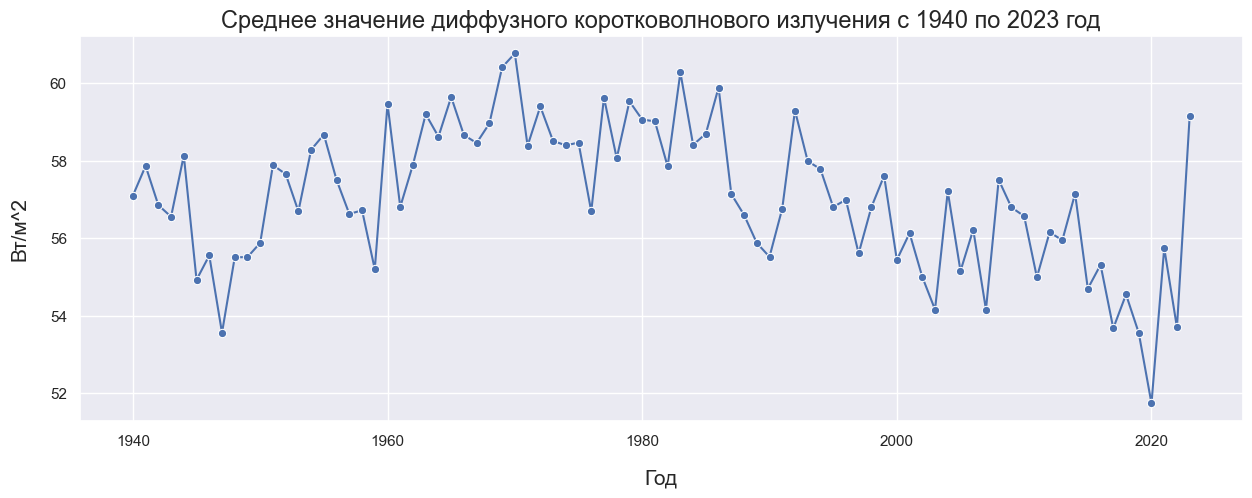

In [58]:
mean_diffuse_shortwave_radiation_by_year = df.groupby('Year')['Diffuse Shortwave Radiation'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение диффузного коротковолнового излучения с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)

sns.lineplot(x=mean_diffuse_shortwave_radiation_by_year['Year'], y=mean_diffuse_shortwave_radiation_by_year['Diffuse Shortwave Radiation'], 
             marker='o')

plt.show()

### *Максимальное значение диффузного коротковолнового излучения с 1940 по 2023 год* ###

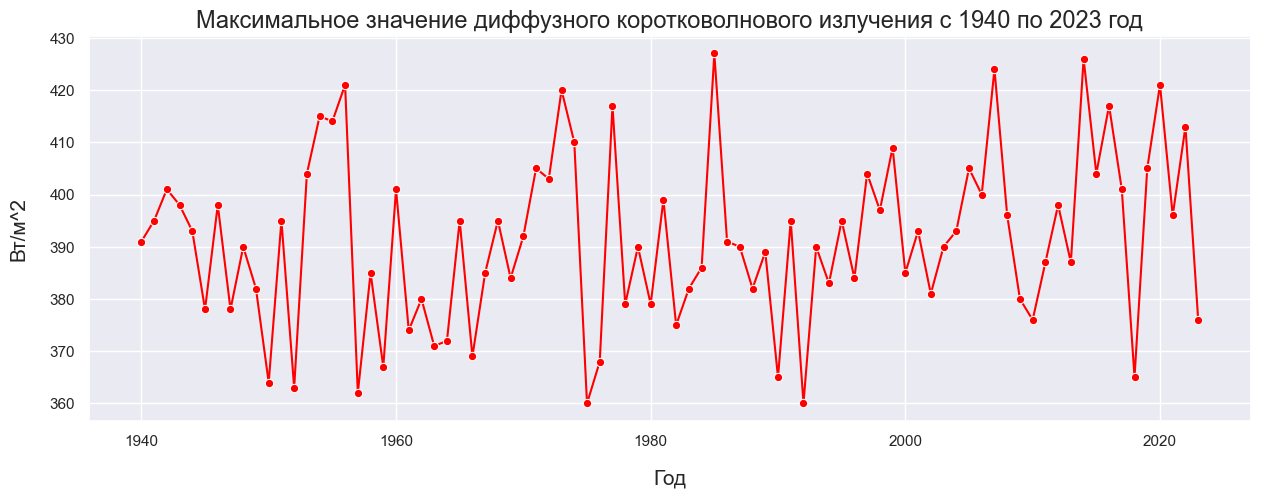

In [59]:
agg_df = df.groupby('Year')['Diffuse Shortwave Radiation'].agg(['max']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Diffuse shortwave radiation', value_name='Diffuse Shortwave Radiation')

plt.figure(figsize=(15, 5))
plt.title('Максимальное значение диффузного коротковолнового излучения с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Diffuse Shortwave Radiation', hue='Diffuse shortwave radiation', marker='o', data=melted_df, palette={'max': 'red'}, 
             legend=False)

plt.show()

### *Среднее значение диффузного коротковолнового излучения за каждый месяц* ###

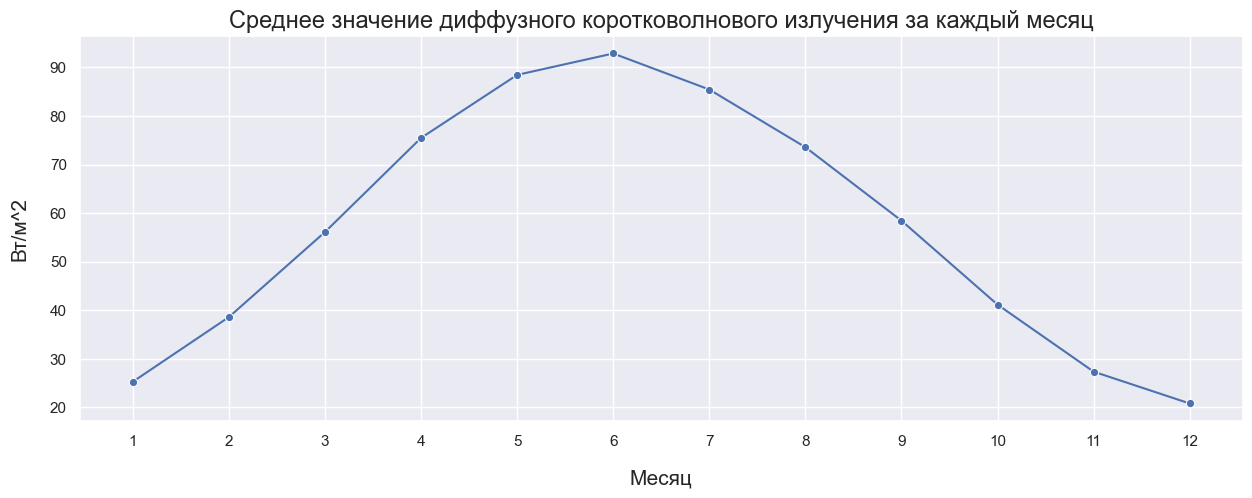

In [60]:
mean_diffuse_shortwave_radiation_every_month = df.groupby('Month')['Diffuse Shortwave Radiation'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение диффузного коротковолнового излучения за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('Вт/м^2', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_diffuse_shortwave_radiation_every_month['Month'], rotation=0)

sns.lineplot(x=mean_diffuse_shortwave_radiation_every_month['Month'], y=mean_diffuse_shortwave_radiation_every_month['Diffuse Shortwave Radiation'], 
             marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Среднее давление на уровне моря (гПа):*</span> ###
- Уровень - cредний уровень моря 
- Среднее атмосферное давление, привязанное к среднему уровню моря

### *Среднее значение среднего давления на уровне моря с 1940 по 2023 год* ###

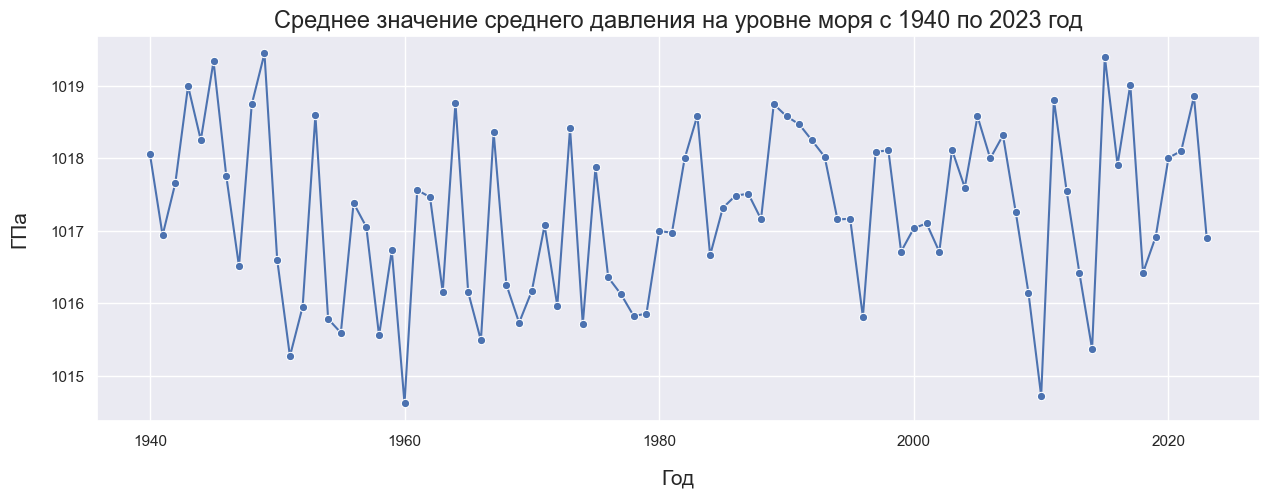

In [61]:
mean_sea_level_pressure_by_year = df.groupby('Year')['Mean Sea Level Pressure [MSL]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение среднего давления на уровне моря с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('ГПа', fontsize=15, labelpad=15)

sns.lineplot(x=mean_sea_level_pressure_by_year['Year'], y=mean_sea_level_pressure_by_year['Mean Sea Level Pressure [MSL]'], marker='o')

plt.show()

### *Максимальное и минимальное значение среднего давления на уровне моря с 1940 по 2023 год* ###

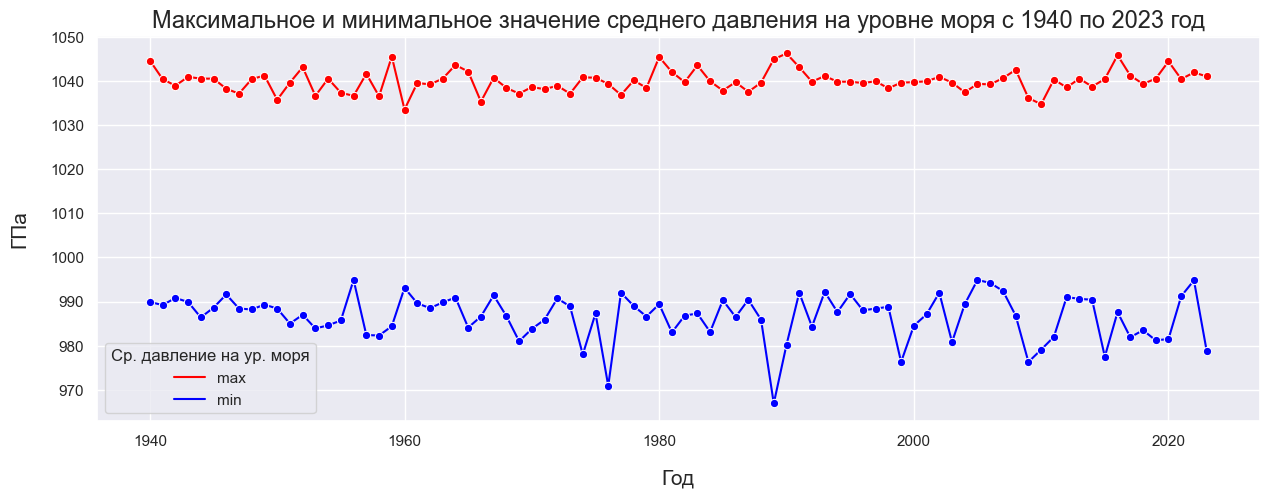

In [62]:
agg_df = df.groupby('Year')['Mean Sea Level Pressure [MSL]'].agg(['max', 'min']).reset_index()
melted_df = pd.melt(agg_df, id_vars='Year', var_name='Ср. давление на ур. моря', value_name='Mean Sea Level Pressure [MSL]')

plt.figure(figsize=(15, 5))
plt.title('Максимальное и минимальное значение среднего давления на уровне моря с 1940 по 2023 год', fontsize=17)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('ГПа', fontsize=15, labelpad=15)

sns.lineplot(x='Year', y='Mean Sea Level Pressure [MSL]', hue='Ср. давление на ур. моря', marker='o', data=melted_df, 
             palette={'max': 'red', 'min': 'blue'})

plt.show()

### *Среднее значение среднего давления на уровне моря за каждый месяц* ###

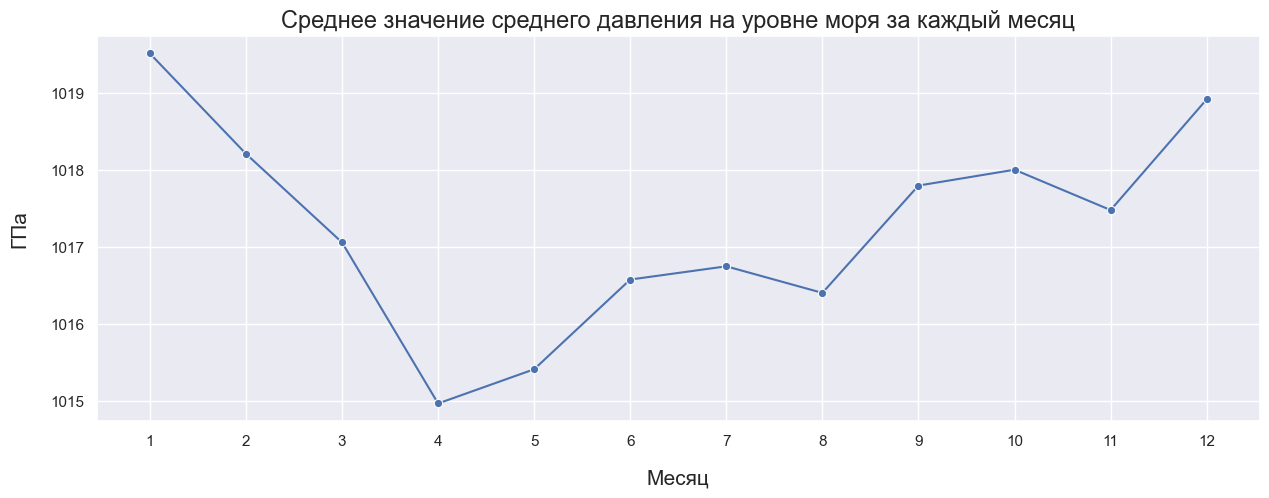

In [63]:
mean_sea_level_pressure_every_month = df.groupby('Month')['Mean Sea Level Pressure [MSL]'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Среднее значение среднего давления на уровне моря за каждый месяц', fontsize=17)
plt.xlabel('Месяц', fontsize=15, labelpad=15)
plt.ylabel('ГПа', fontsize=15, labelpad=15)
plt.xticks(range(1, 13), mean_sea_level_pressure_every_month['Month'], rotation=0)

sns.lineplot(x=mean_sea_level_pressure_every_month['Month'], y=mean_sea_level_pressure_every_month['Mean Sea Level Pressure [MSL]'], marker='o')

plt.show()

### <span style="color:#8ACDD7;">*Геопотенциальная высота (Gpm):*</span> ###
- Уровень - 1000 мб, 850 мб, 800 мб, 700 мб, 500 мб
- Метеорологическая переменная, которая связана с гравитационной потенциальной энергией атмосферного столба

### *Распределение значения геопотенциальной высоты при различном атмосферном давлении* ###

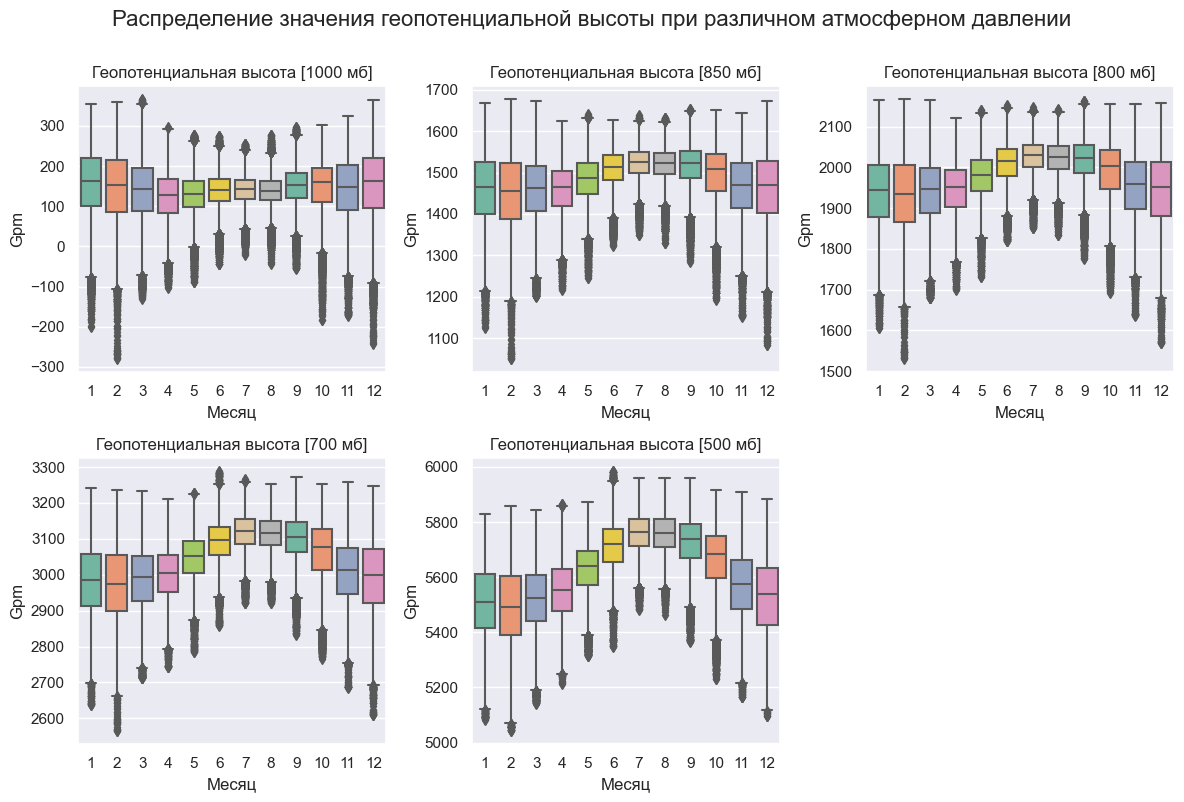

In [64]:
columns_list = ['Geopotential Height [1000 mb]', 
                'Geopotential Height [850 mb]', 
                'Geopotential Height [800 mb]', 
                'Geopotential Height [700 mb]', 
                'Geopotential Height [500 mb]']

columns_dict = {'Geopotential Height [1000 mb]':'Геопотенциальная высота [1000 мб]', 
                'Geopotential Height [850 mb]':'Геопотенциальная высота [850 мб]', 
                'Geopotential Height [800 mb]':'Геопотенциальная высота [800 мб]', 
                'Geopotential Height [700 mb]':'Геопотенциальная высота [700 мб]', 
                'Geopotential Height [500 mb]':'Геопотенциальная высота [500 мб]'}

rows = 2
cols = (len(columns_list) + rows - 1) // rows

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 4 * rows))

for i, column in enumerate(columns_list):
    ax = axes[i // cols, i % cols]
    sns.boxplot(data=df, x='Month', y=column, palette='Set2', ax=ax)
    ax.set_title(columns_dict[column])
    ax.set_xlabel('Месяц')
    ax.set_ylabel('Gpm')

fig.delaxes(axes[1, 2])

plt.suptitle('Распределение значения геопотенциальной высоты при различном атмосферном давлении', y=1.00, fontsize=16)
plt.tight_layout()